# Module 2 Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Overview

# Business Exploration Questions

# Notebook Preparation

## Importing Modules

In [160]:
import pandas as pd

import numpy as np
from numpy import mean
from numpy import std

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import wls
import scipy.stats as stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV

from sklearn.feature_selection import RFECV, RFE

from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

from sklearn import neighbors
from math import sqrt
import itertools

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

#from sklearn.datasets import make_regression


## Notebook Functions

In [2]:
# determine upper and lower percentile ranges
def percentile(column):
    lower_range = round(column.quantile(q=.005), 2)
    upper_range = round(column.quantile(q=.995), 2)
    return lower_range, upper_range

In [314]:
def iqr_outliers(column):
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.75 * iqr)
    upper_range = Q3 + (1.75 * iqr)
    return lower_range,upper_range  

In [304]:
# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# Preprocessing

## Plan
* Identify unneeded categories
* Drop data outside the 99th percentile to remove outliers
* Locate and deal with null values
* Look for and deal with any unusual data entries
* Confirm our data types and convert any incorrect data types
* separate our continuous from our categorical data
* transform and normalize where needed

In [332]:
df = pd.read_csv('kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [333]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [334]:
# looking for outliers in the percentiles

df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

We see a few outliers, and we have so much data that dropping the outlying 1% will allow us to maintain plenty of data. We're going to keep our middle 99% of data for price, lot size, and square footage.

I also see a possible significant outlier in longitude. We will look at what that means.

We'll also inspect the outlier in bedrooms.

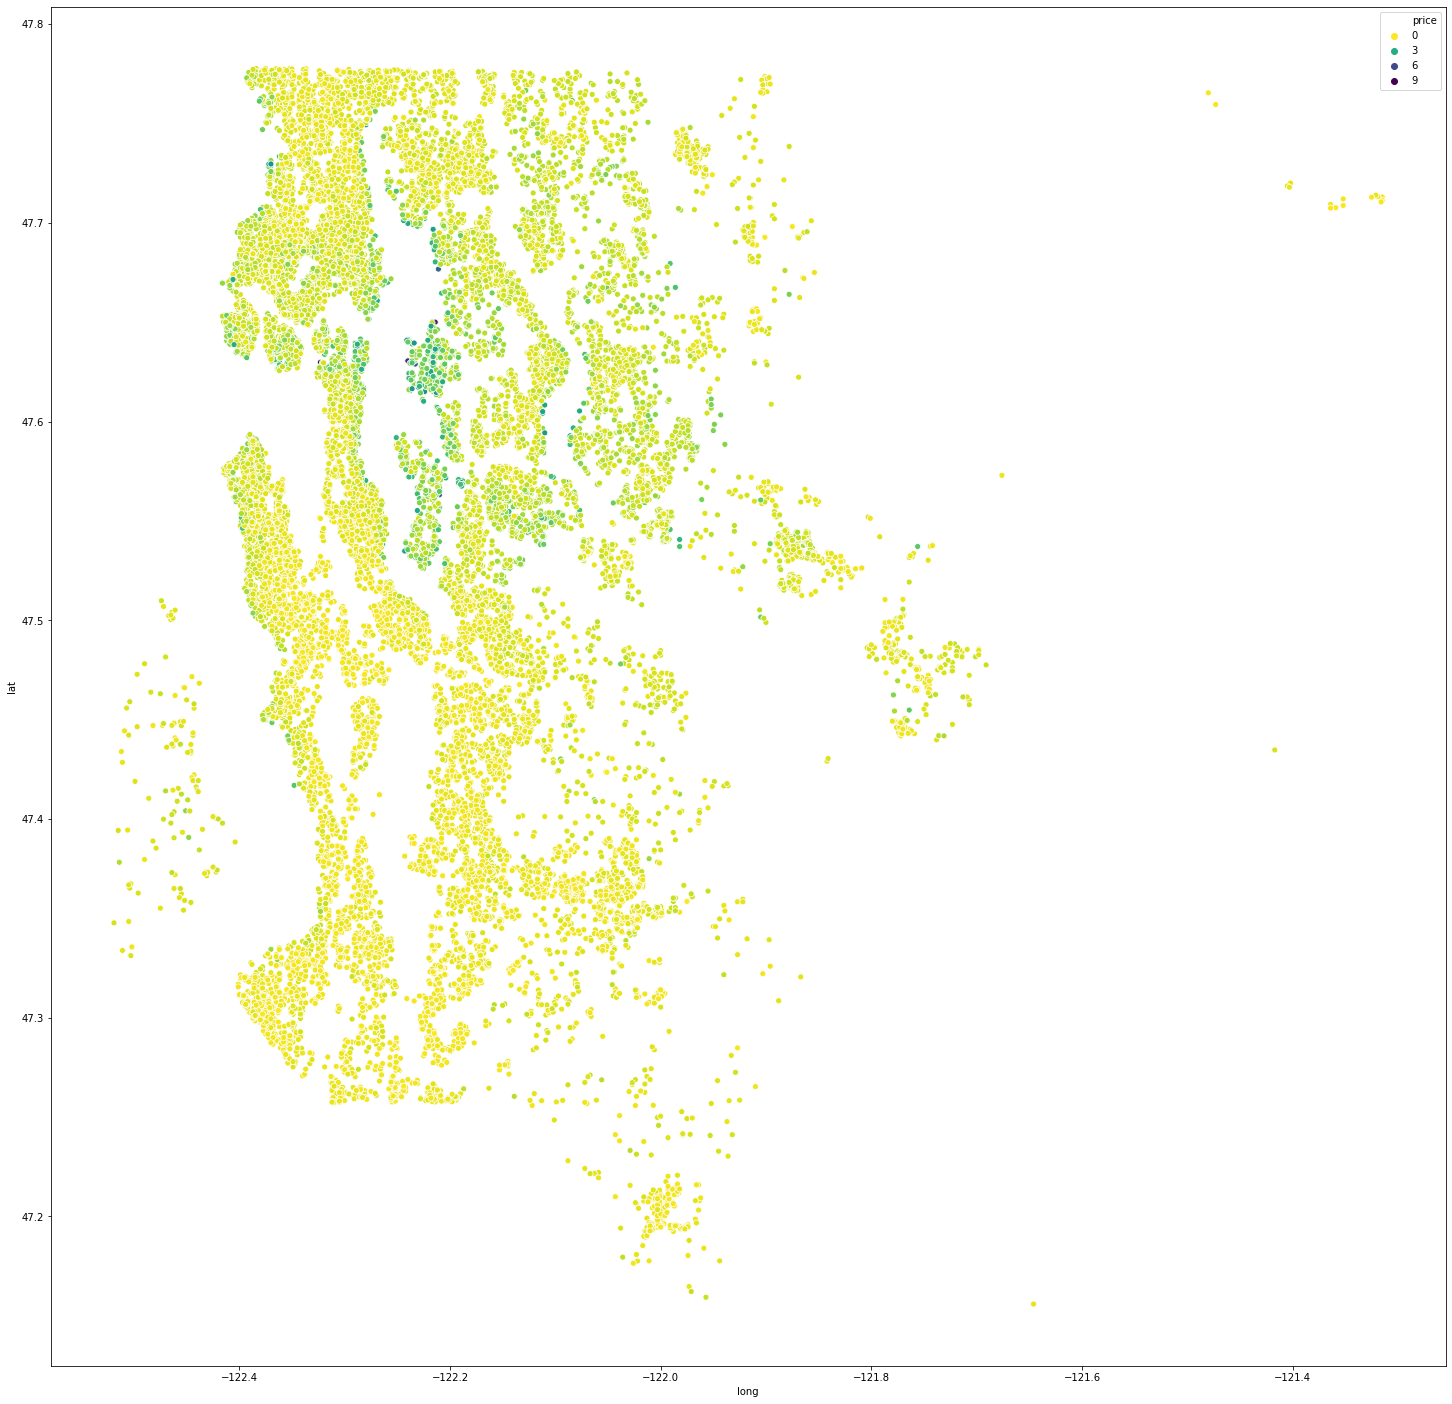

In [335]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="long", y="lat", hue="price", palette="viridis_r");

using latitude and longitude, we basically make a visual map of the King County area. But we can see that there are a few sales in locations that are outliers in some way - possible mis-filed for longitude, but possibly still in King County but far away from the metro area on which we are focusing. I want and need to use location for my model, and sales that are too far outside of our comparison area geographically may add noise to our model. So I'm going to drop the longitude outliers as well. 

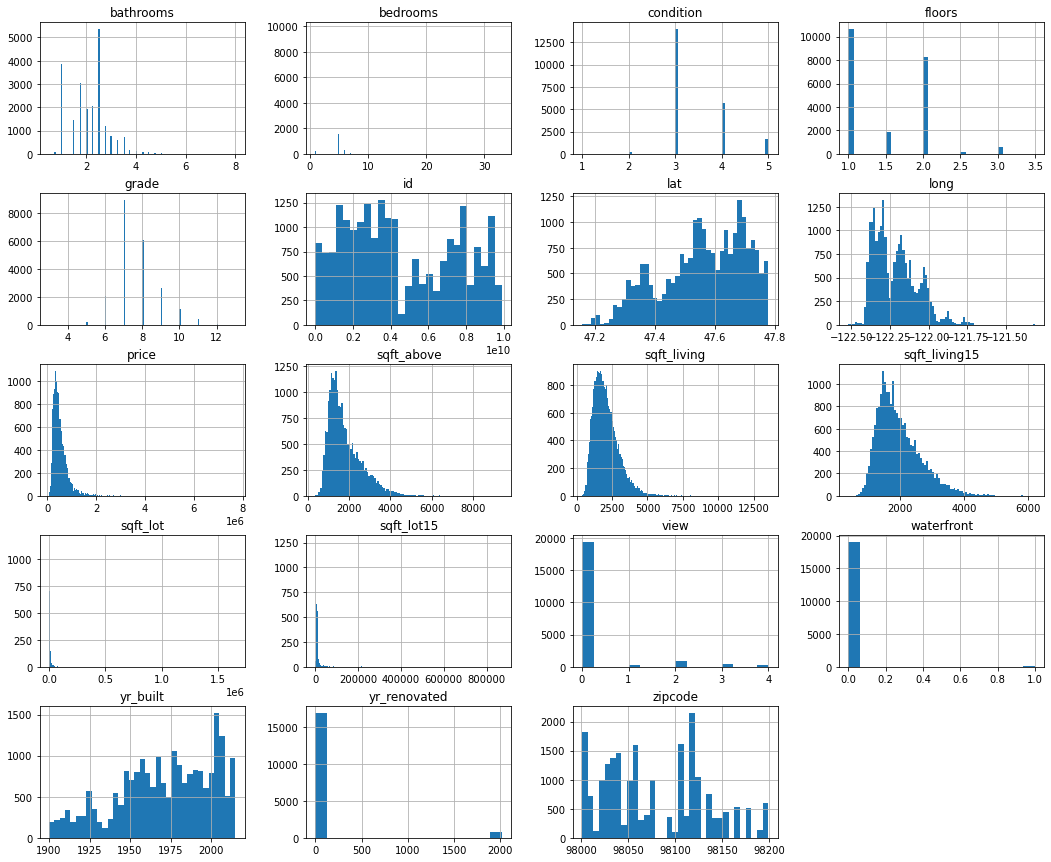

In [336]:
# check how our histograms are looking

df.hist(figsize=(18,15), bins='auto');


In [337]:
# A lot of our variables are not normally shaped, so we can't reliably remove outliers via standard deviation.
# We will use IQR to remove our outliers.
# determing our IQR for price, lot size, sq footage and longitude

pricelower,priceupper = iqr_outliers(df.price)
lotlower,lotupper = iqr_outliers(df.sqft_lot)
sqftlower, sqftupper = iqr_outliers(df.sqft_living)
longlower, longupper = iqr_outliers(df.long)


# dropping the things outside of our lower and upper range

df.drop(df[ (df.price > priceupper) | (df.price < pricelower) ].index , inplace=True)
df.drop(df[ (df.sqft_lot > lotupper) | (df.sqft_lot < lotlower) ].index , inplace=True)
df.drop(df[ (df.sqft_living > sqftupper) | (df.sqft_living < sqftlower) ].index , inplace=True)
df.drop(df[ (df.long > longupper) | (df.long < longlower) ].index , inplace=True)


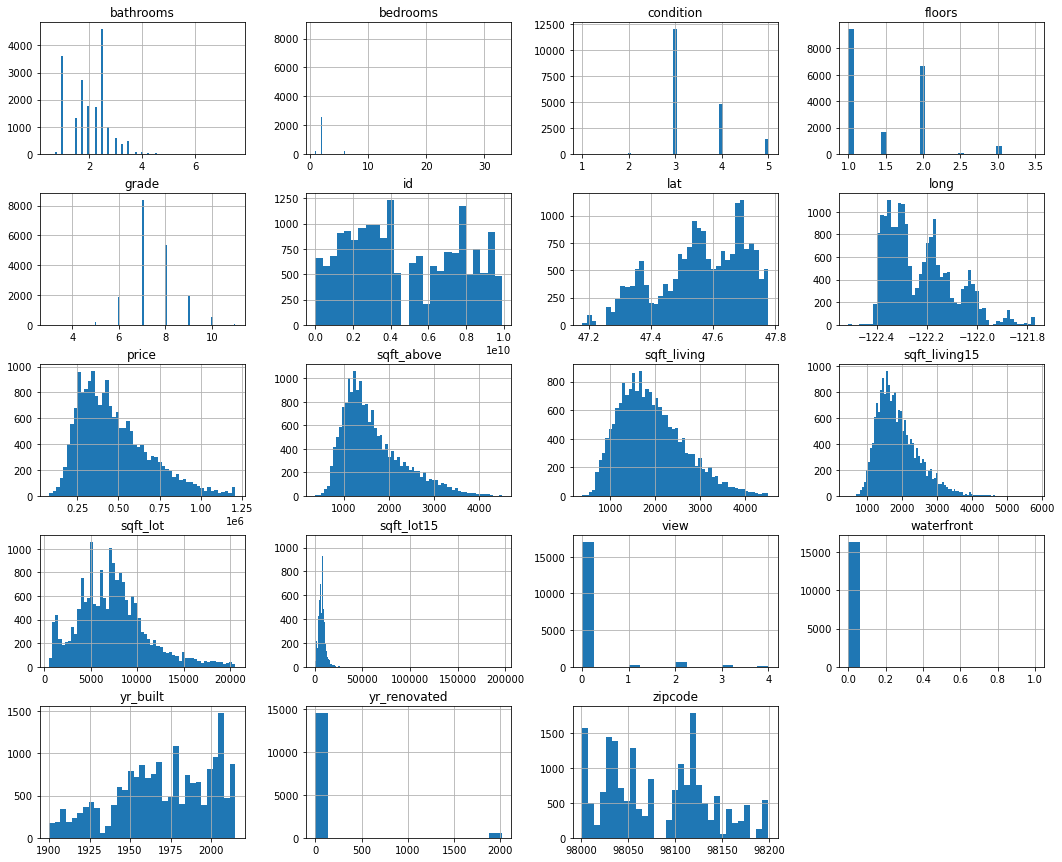

In [338]:
df.hist(figsize=(18,15), bins='auto');

Our data is still largely not normally distributed, but using our IQR has gotten rid of some severely skewing outliers in the price, long and aqft_living categories and ESPECIALLY in the sqft_lot category.

In [339]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.848300e+04  1.848300e+04  18483.000000  18483.000000  18483.000000   
mean   4.734155e+09  4.724165e+05      3.320078      2.032611   1919.161662   
std    2.869353e+09  2.126032e+05      0.911470      0.704607    725.898952   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.301401e+09  3.100000e+05      3.000000      1.500000   1370.000000   
50%    4.047200e+09  4.299000e+05      3.000000      2.000000   1810.000000   
75%    7.504021e+09  5.940000e+05      4.000000      2.500000   2360.000000   
max    9.900000e+09  1.210000e+06     33.000000      7.500000   4510.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  18483.000000  18483.000000  16412.000000  18428.000000  18483.000000   
mean    7352.331007      1.476167      0.002133      0.161385      3.409890   
std     3682.621299      0.542793      0.046132      0.617224      0.649335   
min      520.000000      1.000000      0.000000      0.000000      1.000000   
25%     4840.000000      1.000000      0.000000      0.000000      3.000000   
50%     7200.000000      1.000000      0.000000      0.000000      3.000000   
75%     9334.500000      2.000000      0.000000      0.000000      4.000000   
max    20562.000000      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  18483.000000  18483.000000  18483.000000  15178.000000  18483.000000   
mean       7.483038   1654.478007   1970.094141     73.251680  98081.324677   
std        0.992272    683.208604     29.875933    375.325594     54.021460   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1150.000000   1950.000000      0.000000  98033.000000   
50%        7.000000   1480.000000   1972.000000      0.000000  98074.000000   
75%        8.000000   2010.000000   1997.000000      0.000000  98118.000000   
max       11.000000   4500.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  18483.000000  18483.000000   18483.000000   18483.000000  
mean      47.560542   -122.228775    1875.466916    7349.560190  
std        0.138038      0.129574     590.208228    4529.095591  
min       47.177500   -122.512000     460.000000     651.000000  
25%       47.474500   -122.336000    1450.000000    5000.000000  
50%       47.570400   -122.265000    1760.000000    7210.000000  
75%       47.680000   -122.150000    2200.000000    9000.000000  
max       47.777600   -121.770000    5790.000000  196591.000000

In [340]:
#check what is going on with the weird sqft_lot15 outliers?

df.sort_values('sqft_lot15', ascending=False)

id        date     price  bedrooms  bathrooms  sqft_living  \
9436   3523029077   10/7/2014  297000.0         3       1.00         1340   
4607   3523029059   7/31/2014  181000.0         2       1.50         1560   
5386   1021079099   11/6/2014  345000.0         3       2.50         1990   
8112   1923039089   6/10/2014  285000.0         2       2.00         1651   
7086   8656800020   2/12/2015  309000.0         3       2.50         1450   
...           ...         ...       ...       ...        ...          ...   
20999  8562780530   3/28/2015  338500.0         2       2.25         1150   
20891  8562780540  12/22/2014  325000.0         2       2.25         1150   
513    2827100070   11/5/2014  290000.0         4       1.00         1330   
20733  2827100075   7/27/2014  286308.0         2       1.50         1220   
19653  7899800863   10/1/2014  299900.0         3       2.50         1210   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9436      18000     1.0         0.0   0.0          4      7        1340   
4607      10807     1.0         0.0   0.0          2      7        1560   
5386      20466     1.5         0.0   0.0          4      8        1410   
8112      18200     1.0         0.0   0.0          3      6        1651   
7086      11480     2.0         NaN   0.0          3      7        1450   
...         ...     ...         ...   ...        ...    ...         ...   
20999       711     2.0         0.0   0.0          3      7        1150   
20891       711     2.0         0.0   0.0          3      7        1150   
513        8184     1.5         0.0   0.0          3      7        1330   
20733      1036     3.0         0.0   0.0          3      7        1220   
19653      2046     2.0         0.0   0.0          3      9         920   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9436            0.0      1924           NaN    98070  47.4443 -122.509   
4607            0.0      1949           0.0    98070  47.4444 -122.509   
5386              ?      1987           0.0    98010  47.3259 -121.896   
8112            0.0      1946           0.0    98070  47.4621 -122.461   
7086            0.0      1990           0.0    98014  47.6720 -121.864   
...             ...       ...           ...      ...      ...      ...   
20999           0.0      2013           NaN    98027  47.5323 -122.071   
20891           0.0      2013           NaN    98027  47.5323 -122.070   
513             0.0      1949           0.0    98133  47.7343 -122.347   
20733           0.0      2006           0.0    98133  47.7348 -122.347   
19653         290.0      2008           NaN    98106  47.5212 -122.357   

       sqft_living15  sqft_lot15  
9436            1660      196591  
4607            1660      196591  
5386            1660       93393  
8112            1510       89595  
7086            2080       87991  
...              ...         ...  
20999           1150         748  
20891           1150         748  
513             1220         660  
20733           1210         659  
19653           1070         651  

[18483 rows x 21 columns]

In [352]:
# there is something off about these two large and nearly identical entries at the top of the list. We are going to drop them.

df.drop(df[df['sqft_lot15'] == 196591].index, axis=0, inplace = True)

In [353]:
#check what is going on with the weird bedroom value

df.sort_values('bedrooms', ascending=False)

id        date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895   6/25/2014  640000.0        33       1.75         1620   
8748   1773100755   8/21/2014  520000.0        11       3.00         3000   
15147  5566100170  10/29/2014  650000.0        10       2.00         3610   
19239  8812401450  12/29/2014  660000.0        10       3.00         2920   
4092   1997200215    5/7/2014  599999.0         9       4.50         3830   
...           ...         ...       ...       ...        ...          ...   
16516  2114700500   4/18/2015   90000.0         1       1.00          560   
11493   985001275   6/20/2014  250000.0         1       1.00          800   
18582  3222049087   4/22/2015  570000.0         1       1.00          720   
8614   6303400395   1/30/2015  325000.0         1       0.75          410   
1732    913000340    1/2/2015  252000.0         1       1.00          680   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15856      6000     1.0         0.0   0.0          5      7        1040   
8748       4960     2.0         0.0   0.0          3      7        2400   
15147     11914     2.0         0.0   0.0          4      7        3010   
19239      3745     2.0         0.0   0.0          4      7        1860   
4092       6988     2.5         0.0   0.0          3      7        2450   
...         ...     ...         ...   ...        ...    ...         ...   
16516      4120     1.0         0.0   0.0          3      4         560   
11493     16306     1.0         NaN   0.0          2      6         680   
18582      7540     1.0         1.0   4.0          4      6         720   
8614       8636     1.0         0.0   0.0          2      4         410   
1732       1638     1.0         NaN   4.0          1      6         680   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15856         580.0      1947           0.0    98103  47.6878 -122.331   
8748          600.0      1918        1999.0    98106  47.5560 -122.363   
15147         600.0      1958           0.0    98006  47.5705 -122.175   
19239        1060.0      1913           0.0    98105  47.6635 -122.320   
4092         1380.0      1938           0.0    98103  47.6927 -122.338   
...             ...       ...           ...      ...      ...      ...   
16516           0.0      1947           0.0    98106  47.5335 -122.348   
11493         120.0      1931           0.0    98168  47.4916 -122.308   
18582           0.0      1905           0.0    98198  47.3509 -122.323   
8614            0.0      1953           0.0    98146  47.5077 -122.357   
1732            0.0      1910        1992.0    98116  47.5832 -122.399   

       sqft_living15  sqft_lot15  
15856           1330        4700  
8748            1420        4960  
15147           2040       11914  
19239           1810        3745  
4092            1460        6291  
...              ...         ...  
16516            980        4120  
11493           1270        8666  
18582           1120        9736  
8614            1190        8636  
1732            1010        3621  

[18481 rows x 21 columns]

In [354]:
# this value of 33 in 1620 square feet is obviously a mistake. We're going to impute the mean into this field.

# 11 bedrooms in 3000sf, 10 bedrooms in 2920sf, 10 bedrooms in 3610sf are also obviously mistakes
# We're going to impute the mean into the fields for 10 and 11 bedrooms as well.

bedroom_mean = round(df['bedrooms'].mean(), 0)
bedroom_mean
df.loc[df['bedrooms'] == 33.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 11.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 10.0, 'bedrooms'] = bedroom_mean

df.sort_values('bedrooms', ascending=False)

# fixed our bedroom outliers by imputing the mean
# I remain suspicious of these 9-bedroom entries, but we'll decline from manipulating them further

id        date     price  bedrooms  bathrooms  sqft_living  \
8537    424049043   8/11/2014  450000.0       9.0       7.50         4050   
4092   1997200215    5/7/2014  599999.0       9.0       4.50         3830   
4231   2902200015    1/6/2015  700000.0       9.0       3.00         3680   
18428  8823901445   3/13/2015  934000.0       9.0       3.00         2820   
15056  7418000130  12/11/2014  430000.0       8.0       3.25         4300   
...           ...         ...       ...       ...        ...          ...   
16516  2114700500   4/18/2015   90000.0       1.0       1.00          560   
11493   985001275   6/20/2014  250000.0       1.0       1.00          800   
18582  3222049087   4/22/2015  570000.0       1.0       1.00          720   
8614   6303400395   1/30/2015  325000.0       1.0       0.75          410   
1732    913000340    1/2/2015  252000.0       1.0       1.00          680   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8537       6504     2.0         0.0   0.0          3      7        4050   
4092       6988     2.5         0.0   0.0          3      7        2450   
4231       4400     2.0         0.0   0.0          3      7        2830   
18428      4480     2.0         0.0   0.0          3      7        1880   
15056     10441     2.0         0.0   0.0          4      8        2800   
...         ...     ...         ...   ...        ...    ...         ...   
16516      4120     1.0         0.0   0.0          3      4         560   
11493     16306     1.0         NaN   0.0          2      6         680   
18582      7540     1.0         1.0   4.0          4      6         720   
8614       8636     1.0         0.0   0.0          2      4         410   
1732       1638     1.0         NaN   4.0          1      6         680   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8537            0.0      1996           0.0    98144  47.5923 -122.301   
4092         1380.0      1938           0.0    98103  47.6927 -122.338   
4231          850.0      1908           0.0    98102  47.6374 -122.324   
18428         940.0      1918           0.0    98105  47.6654 -122.307   
15056        1500.0      1979           0.0    98059  47.4786 -122.131   
...             ...       ...           ...      ...      ...      ...   
16516           0.0      1947           0.0    98106  47.5335 -122.348   
11493         120.0      1931           0.0    98168  47.4916 -122.308   
18582           0.0      1905           0.0    98198  47.3509 -122.323   
8614            0.0      1953           0.0    98146  47.5077 -122.357   
1732            0.0      1910        1992.0    98116  47.5832 -122.399   

       sqft_living15  sqft_lot15  
8537            1448        3866  
4092            1460        6291  
4231            1960        2450  
18428           2460        4400  
15056           1780       10457  
...              ...         ...  
16516            980        4120  
11493           1270        8666  
18582           1120        9736  
8614            1190        8636  
1732            1010        3621  

[18481 rows x 21 columns]

In [355]:
df

# confirming we still have 18k entries

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0       3.0       1.00         1180   
1      6414100192   12/9/2014  538000.0       3.0       2.25         2570   
2      5631500400   2/25/2015  180000.0       2.0       1.00          770   
3      2487200875   12/9/2014  604000.0       4.0       3.00         1960   
4      1954400510   2/18/2015  510000.0       3.0       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0       3.0       2.50         1530   
21593  6600060120   2/23/2015  400000.0       4.0       2.50         2310   
21594  1523300141   6/23/2014  402101.0       2.0       0.75         1020   
21595   291310100   1/16/2015  400000.0       3.0       2.50         1600   
21596  1523300157  10/15/2014  325000.0       2.0       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[18481 rows x 21 columns]

In [356]:
# look for nulls

df.isna().sum()

# all of our null values are in columns that I want to be binary flags. So, will change all non-null values > 0 in those
# columns to 1, and all null values to 0.
# this will turn waterfront, view and renovated into dichotomous choice flags

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2071
view               55
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3304
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [357]:
# change all non-null values > 0 in those columns to 1

df.loc[df['waterfront'] > 0, 'waterfront'] = 1
df.loc[df['view'] > 0, 'view'] = 1
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

# now anything that is not a 1 becomes a 0

df.loc[df['waterfront']!= 1, 'waterfront'] = 0
df.loc[df['view'] != 1, 'view'] = 0
df.loc[df['yr_renovated'] != 1, 'yr_renovated'] = 0

# since we're making it a binary flag, we'll rename yr_renovated to renovated
df = df.rename(columns={'yr_renovated' : 'renovated'})

In [358]:
# we've removed the null values from our three binary columns

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [359]:
# check data types

df.dtypes

# date and sqft_basement need to be fixed. This explains why the basement variable didn't show
# up in our histogram

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
renovated        float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [360]:
#Checking all top occuring for each column to find weird entries

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000162
4345000510    0.000108
7972000010    0.000108
641900050     0.000108
2724049222    0.000108
Name: id, dtype: float64 


date 
 6/23/2014    0.006547
6/25/2014    0.006277
4/28/2015    0.005898
4/14/2015    0.005898
6/26/2014    0.005790
Name: date, dtype: float64 


price 
 350000.0    0.008495
450000.0    0.008279
325000.0    0.007521
425000.0    0.007467
550000.0    0.007413
Name: price, dtype: float64 


bedrooms 
 3.0    0.470646
4.0    0.304204
2.0    0.138629
5.0    0.064445
6.0    0.010822
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249986
1.00    0.196039
1.75    0.147503
2.00    0.095125
2.25    0.094421
Name: bathrooms, dtype: float64 


sqft_living 
 1400    0.007034
1300    0.006818
1660    0.006764
1440    0.006710
1010    0.006710
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.018505
6000    0.015042
4000    0.013095
7200    0.011201
4800    0.006277
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.513879
2.0    0.3612

In [361]:
# basement has a weird entry of '?' which we will convert to a 0, and then
# converting our sqft_basement to a float,
# and our date to a proper date

df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])


# we're now going to extract just the month from our datetime, and store that in a new column
# we won't be using our entire date - we're interested in the month that houses are sold
df['month'] = pd.DatetimeIndex(df['date']).month

In [362]:
# data types are now fixed

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
renovated               float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month                     int64
dtype: object

In [363]:
# now that its data type is correct, we see that most properties don't have basements. Because of this,
# we will add basement to our binary flag group, and just list if it has a basement or not.

df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1
df.loc[df['sqft_basement'] != 1, 'sqft_basement'] = 0

# we'll also change the name of our column to basement
df = df.rename(columns={'sqft_basement' : 'basement'})

In [364]:
# We're trying out engineering a feature that penalizes or rewards being the smallest or biggest
# property in the neighborhood, as generally you don't want to be either. This is attempting 
# to impose a categorical relationship on how the property relates to its neighbors

df['comparative_sf'] = 0
df.loc[df['sqft_living'] <= (df['sqft_living15']*.75), 'comparative_sf'] = '1'
df.loc[(df['sqft_living'] > (df['sqft_living15']*.75)) | (df['sqft_living'] < (df['sqft_living15']*1.25)), 'comparative_sf'] = '2'
df.loc[df['sqft_living'] >= (df['sqft_living15']*1.25), 'comparative_sf'] = '3'

df['comparative_lot'] = 0
df.loc[df['sqft_lot'] <= (df['sqft_lot15']*.75), 'comparative_lot'] = '1'
df.loc[(df['sqft_lot'] > (df['sqft_lot15']*.75)) | (df['sqft_lot'] < (df['sqft_lot15']*1.25)), 'comparative_lot'] = '2'
df.loc[df['sqft_lot'] >= (df['sqft_lot15']*1.25), 'comparative_lot'] = '3'

### Look for Multicollinearity

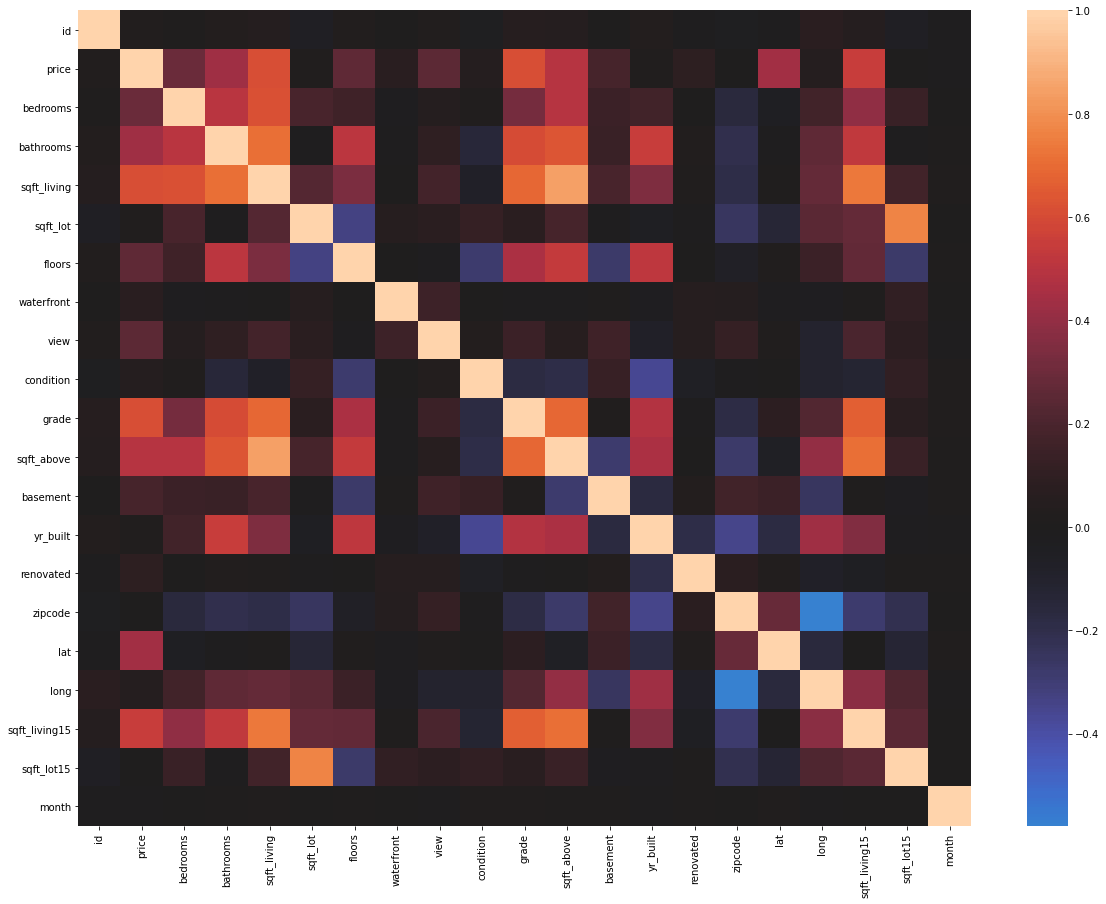

In [365]:
# look for multicollinearity of features
data_pred = df
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data_pred.corr(), center=0);

plt.show()

In [366]:
data_pred.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.030360  0.009872   0.035319     0.039209 -0.048327   
price          0.030360  1.000000  0.294723   0.433075     0.605824  0.013715   
bedrooms       0.009872  0.294723  1.000000   0.504906     0.622561  0.197287   
bathrooms      0.035319  0.433075  0.504906   1.000000     0.712548 -0.006651   
sqft_living    0.039209  0.605824  0.622561   0.712548     1.000000  0.229737   
sqft_lot      -0.048327  0.013715  0.197287  -0.006651     0.229737  1.000000   
floors         0.027960  0.262557  0.155696   0.512504     0.339802 -0.331839   
waterfront     0.005750  0.064240 -0.019943  -0.009529    -0.002554  0.054109   
view           0.029386  0.258528  0.049278   0.095739     0.176501  0.081171   
condition     -0.030614  0.048498  0.019476  -0.145101    -0.072893  0.119031   
grade          0.052103  0.615663  0.327519   0.603937     0.688047  0.079652   
sqft_above     0.044488  0.496288  0.492769   0.633153     0.842653  0.182759   
basement      -0.004359  0.185001  0.143910   0.135537     0.187590 -0.015508   
yr_built       0.037149  0.024349  0.168225   0.546134     0.344658 -0.039897   
renovated     -0.011511  0.093528  0.002960   0.026969     0.025576 -0.010433   
zipcode       -0.035115 -0.003398 -0.160376  -0.208441    -0.194451 -0.248642   
lat           -0.006294  0.442617 -0.042639  -0.013388     0.013145 -0.139585   
long           0.079448  0.041336  0.164793   0.260164     0.275506  0.243725   
sqft_living15  0.047799  0.543823  0.392119   0.527763     0.737890  0.273852   
sqft_lot15    -0.054170  0.001633  0.139506  -0.010426     0.170491  0.769190   
month         -0.015706 -0.011503 -0.001412   0.013388     0.015560 -0.004568   

                 floors  waterfront      view  condition     grade  \
id             0.027960    0.005750  0.029386  -0.030614  0.052103   
price          0.262557    0.064240  0.258528   0.048498  0.615663   
bedrooms       0.155696   -0.019943  0.049278   0.019476  0.327519   
bathrooms      0.512504   -0.009529  0.095739  -0.145101  0.603937   
sqft_living    0.339802   -0.002554  0.176501  -0.072893  0.688047   
sqft_lot      -0.331839    0.054109  0.081171   0.119031  0.079652   
floors         1.000000   -0.003824 -0.019802  -0.285488  0.464376   
waterfront    -0.003824    1.000000  0.154861   0.003167 -0.006156   
view          -0.019802    0.154861  1.000000   0.034384  0.145482   
condition     -0.285488    0.003167  0.034384   1.000000 -0.174100   
grade          0.464376   -0.006156  0.145482  -0.174100  1.000000   
sqft_above     0.537375   -0.013934  0.061601  -0.187414  0.689451   
basement      -0.273683    0.012143  0.160202   0.127878  0.017191   
yr_built       0.516436   -0.026305 -0.075716  -0.362029  0.486201   
renovated      0.002184    0.050556  0.056048  -0.054758 -0.006405   
zipcode       -0.065789    0.042610  0.120240  -0.005421 -0.182738   
lat            0.025244   -0.023187  0.018010  -0.001569  0.084512   
long           0.144501   -0.029359 -0.098759  -0.098802  0.226924   
sqft_living15  0.267203    0.012394  0.202632  -0.120832  0.663818   
sqft_lot15    -0.275559    0.104302  0.082073   0.109959  0.066796   
month          0.011440    0.003148 -0.007619   0.022663  0.014343   

               sqft_above  basement  yr_built  renovated   zipcode       lat  \
id               0.044488 -0.004359  0.037149  -0.011511 -0.035115 -0.006294   
price            0.496288  0.185001  0.024349   0.093528 -0.003398  0.442617   
bedrooms         0.492769  0.143910  0.168225   0.002960 -0.160376 -0.042639   
bathrooms        0.633153  0.135537  0.546134   0.026969 -0.208441 -0.013388   
sqft_living      0.842653  0.187590  0.344658   0.025576 -0.194451  0.013145   
sqft_lot         0.182759 -0.015508 -0.039897  -0.010433 -0.248642 -0.139585   
floors           0.537375 -0.273683  0.516436   0.002184 -0.065789  0.025244   
waterfront      -0.013934  0.012143 -0.026305   0.050556 

In [367]:
#Get our list of highly correlated feature pairs with following steps:

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_correlations = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations to get rid of self pairs
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation
df_correlations[df_correlations.correlation>.75]


level_0      level_1  correlation
pairs                                                           
(sqft_above, sqft_living)   sqft_above  sqft_living     0.842653
(sqft_living, sqft_above)  sqft_living   sqft_above     0.842653
(sqft_lot15, sqft_lot)      sqft_lot15     sqft_lot     0.769190
(sqft_lot, sqft_lot15)        sqft_lot   sqft_lot15     0.769190

we're going to drop sqft_above and sqft_lot15 and just keep the base sqft_living and sqft_lot.


In [368]:
df.reset_index(drop=True, inplace=True)


In [369]:
df_cleaned = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 
                'grade', 'basement', 'yr_built', 'renovated', 'zipcode', 'month', 'comparative_sf','comparative_lot', 'sqft_living15']]

df_cleaned

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0       3.0       1.00         1180      5650     1.0   
1      538000.0       3.0       2.25         2570      7242     2.0   
2      180000.0       2.0       1.00          770     10000     1.0   
3      604000.0       4.0       3.00         1960      5000     1.0   
4      510000.0       3.0       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
18476  360000.0       3.0       2.50         1530      1131     3.0   
18477  400000.0       4.0       2.50         2310      5813     2.0   
18478  402101.0       2.0       0.75         1020      1350     2.0   
18479  400000.0       3.0       2.50         1600      2388     2.0   
18480  325000.0       2.0       0.75         1020      1076     2.0   

       waterfront  condition  grade  basement  yr_built  renovated  zipcode  \
0             0.0          3      7       0.0      1955        0.0    98178   
1             0.0          3      7       1.0      1951        1.0    98125   
2             0.0          3      6       0.0      1933        0.0    98028   
3             0.0          5      7       1.0      1965        0.0    98136   
4             0.0          3      8       0.0      1987        0.0    98074   
...           ...        ...    ...       ...       ...        ...      ...   
18476         0.0          3      8       0.0      2009        0.0    98103   
18477         0.0          3      8       0.0      2014        0.0    98146   
18478         0.0          3      7       0.0      2009        0.0    98144   
18479         0.0          3      8       0.0      2004        0.0    98027   
18480         0.0          3      7       0.0      2008        0.0    98144   

       month comparative_sf comparative_lot  sqft_living15  
0         10              2               2           1340  
1         12              3               2           1690  
2          2              2               2           2720  
3         12              3               2           1360  
4          2              2               2           1800  
...      ...            ...             ...            ...  
18476      5              2               2           1530  
18477      2              3               2           1830  
18478      6              2               2           1020  
18479      1              2               3           1410  
18480     10              2               2           1020  

[18481 rows x 17 columns]

We dropped:
* ID - just a home id
* Date - we extracted Month for our use
* View - according to the file, just means the house was viewed
* sqft_above - correlated with sqft_living
* sqft_lot15 - correlated with sqft_lot
* sqft_living15 - correlated with sqft_living
* lat - did not use
* long - eliminated outliers with long, but no longer used

## Study of variables

### Separate pre-processing categories

In [385]:
# prepare our categories for data transformation by separating into our data types -
# ordinal, continuous, categorical/dichotomous, and need to be binned/further processed

target = ['price']
categoricals = ['price', 'yr_built', 'month', 'zipcode', 'waterfront', 'renovated','basement', 'comparative_sf', 'comparative_lot']  
continuous = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms', 'condition', 'grade', 'sqft_living15']

### Target Variable

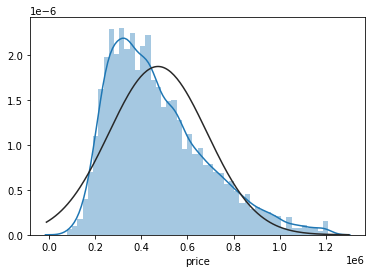

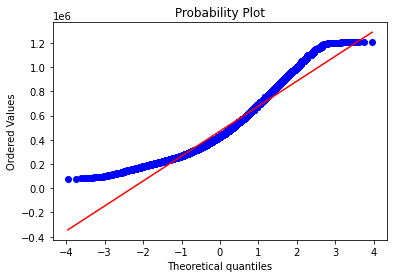

In [371]:
#histogram and normal probability plot
sns.distplot(df_cleaned['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_cleaned['price'], plot=plt)

# our sales price histogram is positively skewed and has a high peak

In [372]:
#skewness and kurtosis
print("Skewness: %f" % df_cleaned['price'].skew())
print("Kurtosis: %f" % df_cleaned['price'].kurt())

Skewness: 0.902840
Kurtosis: 0.471884


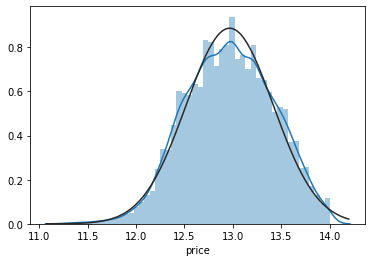

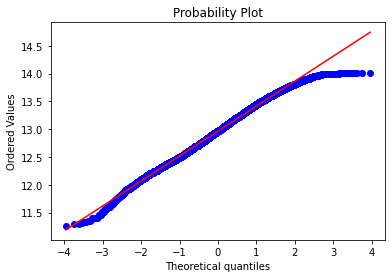

In [373]:
# log transform our target price 
df_target_log = np.log(df_cleaned['price'])

#histogram and normal probability plot
sns.distplot(df_target_log, fit=norm);
fig = plt.figure()
res = stats.probplot(df_target_log, plot=plt)

# Our target price is more normally distributed now

### Categoricals

In [427]:
df_categoricals = df_cleaned[categoricals]

df_categoricals

price  yr_built  month  zipcode  waterfront  renovated  basement  \
0      221900.0      1955     10    98178         0.0        0.0       0.0   
1      538000.0      1951     12    98125         0.0        1.0       1.0   
2      180000.0      1933      2    98028         0.0        0.0       0.0   
3      604000.0      1965     12    98136         0.0        0.0       1.0   
4      510000.0      1987      2    98074         0.0        0.0       0.0   
...         ...       ...    ...      ...         ...        ...       ...   
18476  360000.0      2009      5    98103         0.0        0.0       0.0   
18477  400000.0      2014      2    98146         0.0        0.0       0.0   
18478  402101.0      2009      6    98144         0.0        0.0       0.0   
18479  400000.0      2004      1    98027         0.0        0.0       0.0   
18480  325000.0      2008     10    98144         0.0        0.0       0.0   

      comparative_sf comparative_lot  
0                  2               2  
1                  3               2  
2                  2               2  
3                  3               2  
4                  2               2  
...              ...             ...  
18476              2               2  
18477              3               2  
18478              2               2  
18479              2               3  
18480              2               2  

[18481 rows x 9 columns]

Let's look at mean price by month and see if there are any better insights.

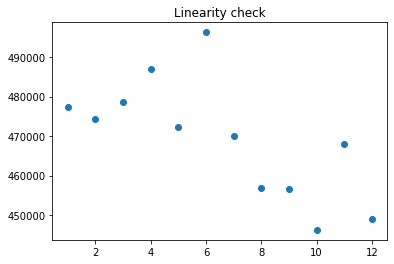

In [428]:
monthly_prices = df_categoricals.groupby('month')['price'].mean()
month = df_categoricals['month'].unique()

plt.scatter(month, monthly_prices)
plt.title("Linearity check")
plt.show()


Our average per month is all over. We are going to keep this as a categorical.

In [429]:
# group our dataframe by month with average price
###monthranks = pd.DataFrame(df_categoricals.groupby('month')['price'].mean())

# set the entries per segment into which to bin our variable
###entries = 3

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
###monthranks['quarter'] = np.divmod(np.arange(len(monthranks)),entries)[0]+1

# make a new column on our dataframe. Look up each month entry's segment, and append to the column.
###df_categoricals['quarter'] = df_categoricals['month'].apply(lambda x: make_group(x, monthranks, 'quarter'))

In [430]:
# binning our year built into equally sized bins, where each bin has the same number of entries

df_categoricals["year_block"] = pd.qcut(df_categoricals['yr_built'], q=20)

In [431]:
df_categoricals

price  yr_built  month  zipcode  waterfront  renovated  basement  \
0      221900.0      1955     10    98178         0.0        0.0       0.0   
1      538000.0      1951     12    98125         0.0        1.0       1.0   
2      180000.0      1933      2    98028         0.0        0.0       0.0   
3      604000.0      1965     12    98136         0.0        0.0       1.0   
4      510000.0      1987      2    98074         0.0        0.0       0.0   
...         ...       ...    ...      ...         ...        ...       ...   
18476  360000.0      2009      5    98103         0.0        0.0       0.0   
18477  400000.0      2014      2    98146         0.0        0.0       0.0   
18478  402101.0      2009      6    98144         0.0        0.0       0.0   
18479  400000.0      2004      1    98027         0.0        0.0       0.0   
18480  325000.0      2008     10    98144         0.0        0.0       0.0   

      comparative_sf comparative_lot        year_block  
0                  2               2  (1954.0, 1959.0]  
1                  3               2  (1950.0, 1954.0]  
2                  2               2  (1925.0, 1939.0]  
3                  3               2  (1963.0, 1967.0]  
4                  2               2  (1981.0, 1987.0]  
...              ...             ...               ...  
18476              2               2  (2007.0, 2011.0]  
18477              3               2  (2011.0, 2015.0]  
18478              2               2  (2007.0, 2011.0]  
18479              2               3  (2002.0, 2005.0]  
18480              2               2  (2007.0, 2011.0]  

[18481 rows x 10 columns]

In [432]:
categorical = ['zipcode', 'waterfront', 'renovated', 'basement', 'comparative_sf', 'comparative_lot', 'month', 'year_block']

df_categorical_preprocess = df_categoricals[categorical]

# tagging all of these things as categoricals
for item in categorical:
    df_categorical_preprocess[item] = df_categorical_preprocess[item].astype('category')
    
df_categorical_preprocess['price'] = df_cleaned['price']

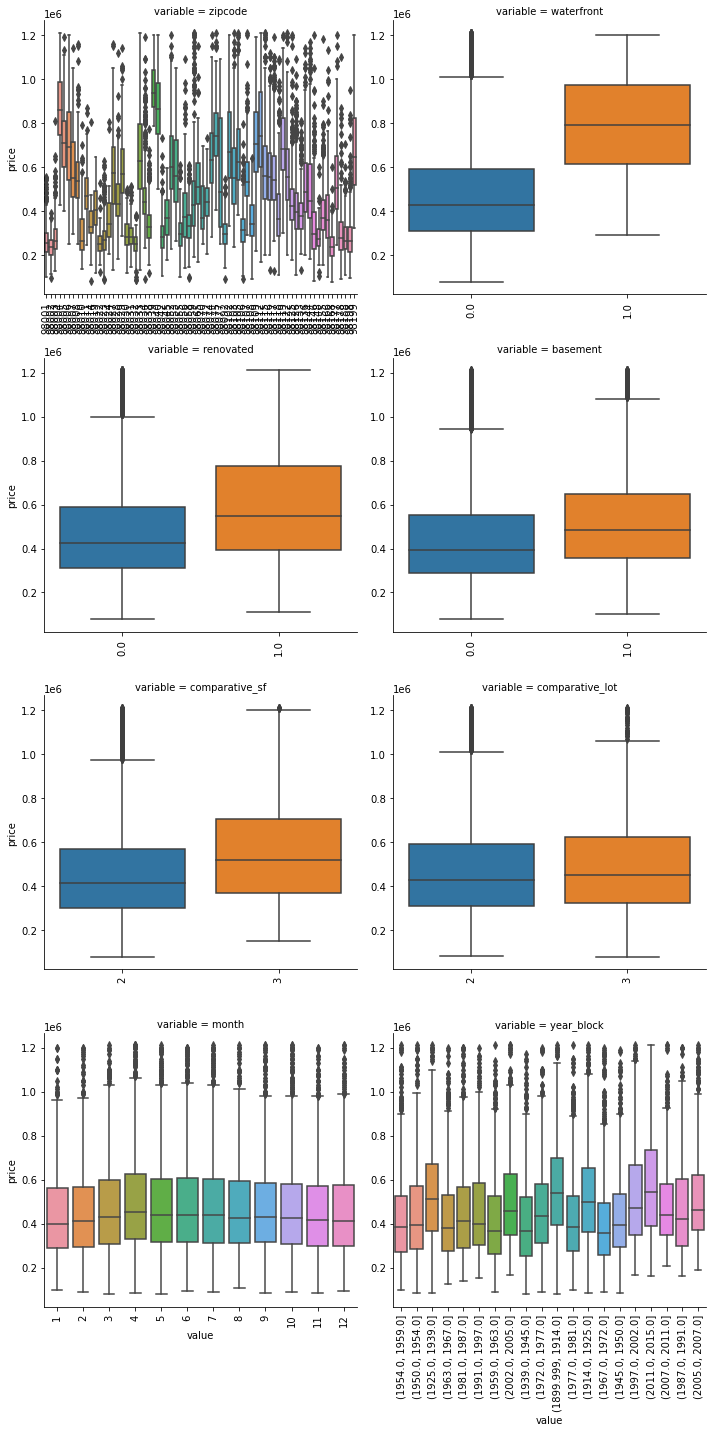

In [433]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_categorical_preprocess, id_vars=['price'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

In [434]:
# make a processed bins file for use with linear regression
df_categoricals_processed = pd.get_dummies(df_categorical_preprocess[categorical], prefix=categorical, drop_first=True)

In [435]:
df_categoricals_processed

zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98011  zipcode_98014  zipcode_98019  zipcode_98022  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98023  zipcode_98024  zipcode_98027  zipcode_98028  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              1   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              1              0   
18480              0              0              0              0   

       zipcode_98029  zipcode_98030  zipcode_98031  zipcode_98032  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
1

### Continuous/Ordinal

In [436]:
df_continuous = df_cleaned[continuous]

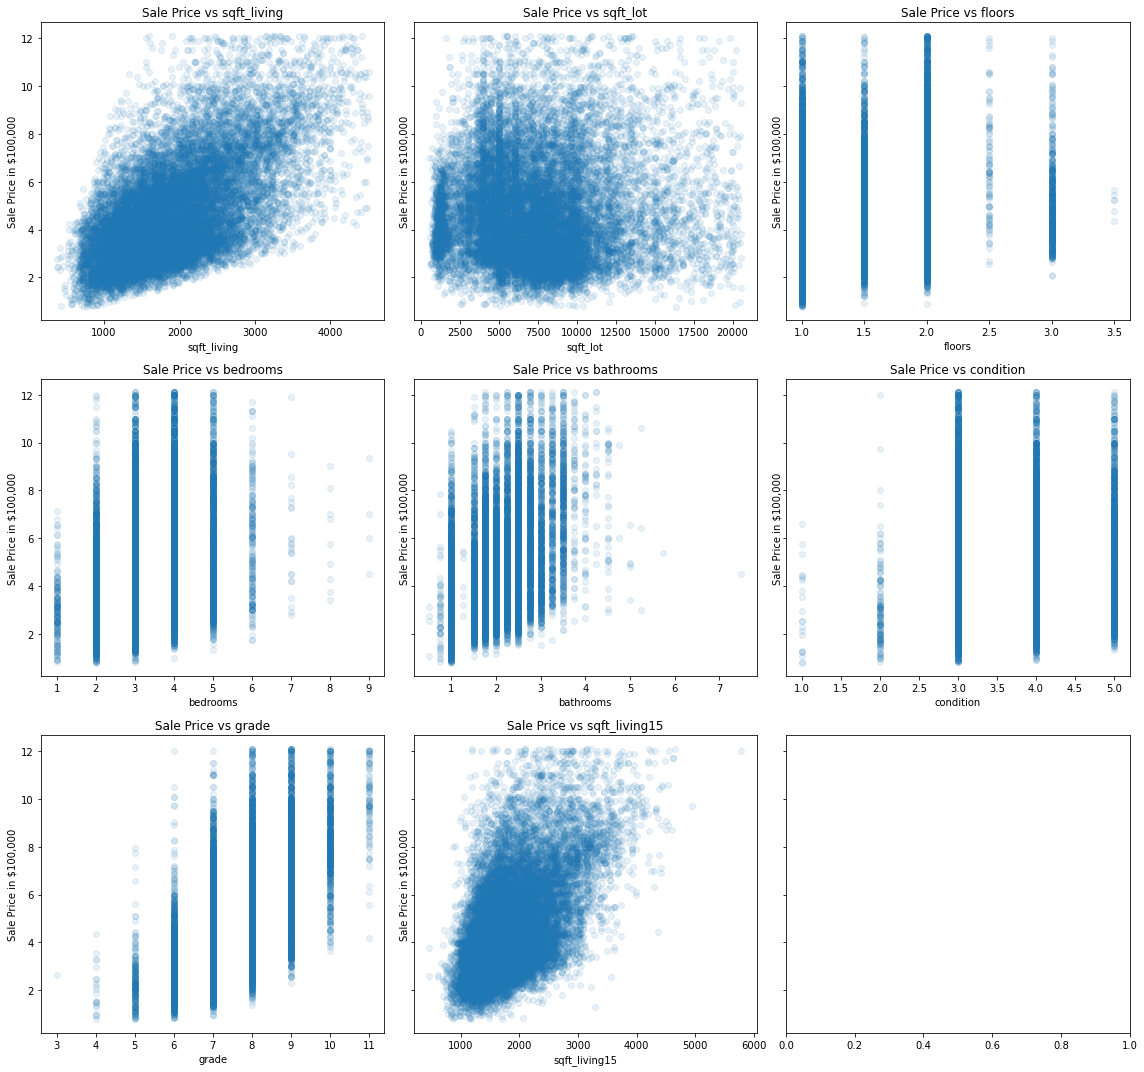

In [437]:
# check linearity

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df_continuous.columns):
    ax.scatter(df_continuous[column], df_cleaned['price']/100000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()


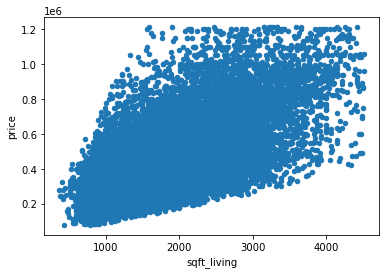

In [438]:
# sqft_living has the strongest and most obvious relationship to price thus far

var = 'sqft_living'
data = pd.concat([df_cleaned['price'], df_continuous[var]], axis=1)
data.plot.scatter(x=var, y='price');


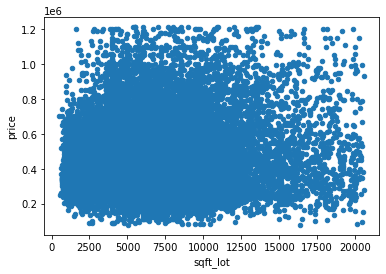

In [439]:
var = 'sqft_lot'
data = pd.concat([df_cleaned['price'], df_continuous[var]], axis=1)
data.plot.scatter(x=var, y='price');

# this variable does not appear to have a linear relationship with the target variable.

Fun fact - "grade" was not well defined in the features list. I looked it up and found that grade is "	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value." So, it's the quality of building materials, and DEFINITELY worth keeping in our model.

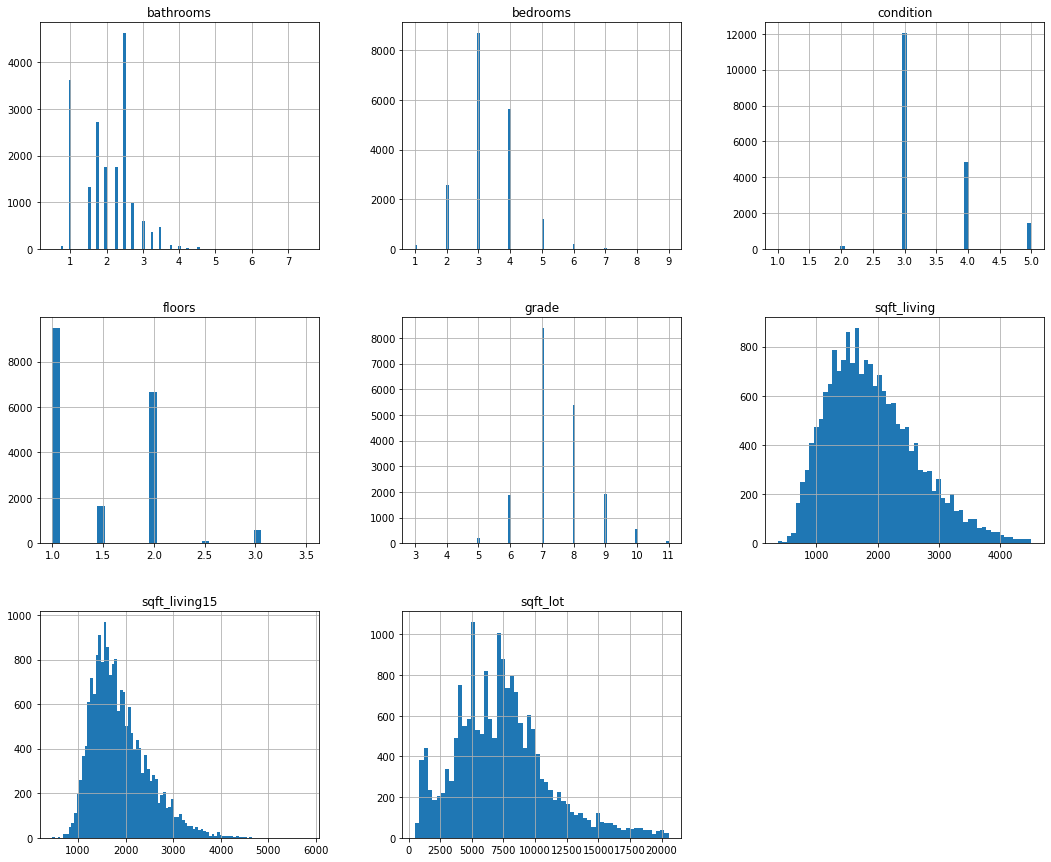

In [440]:
# check out our histograms

df_continuous.hist(figsize=(18,15), bins='auto');


In [441]:
# We're going to transform and standardize all of these.

# log features
log_names = [f'{column}' for column in df_continuous.columns]

df_continuous_log = np.log(df_continuous)
df_continuous_log.columns = log_names

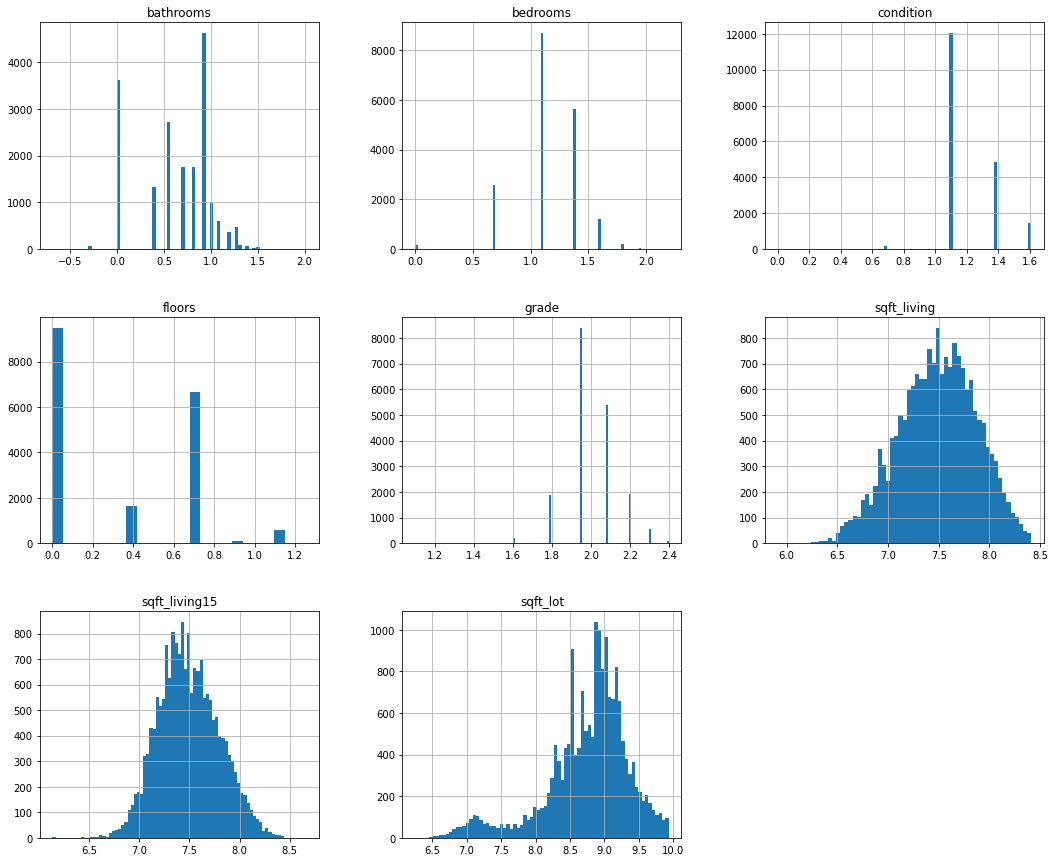

In [442]:
# check out our histograms for our transformed data

df_continuous_log.hist(figsize=(18,15), bins='auto');

# looks more normal

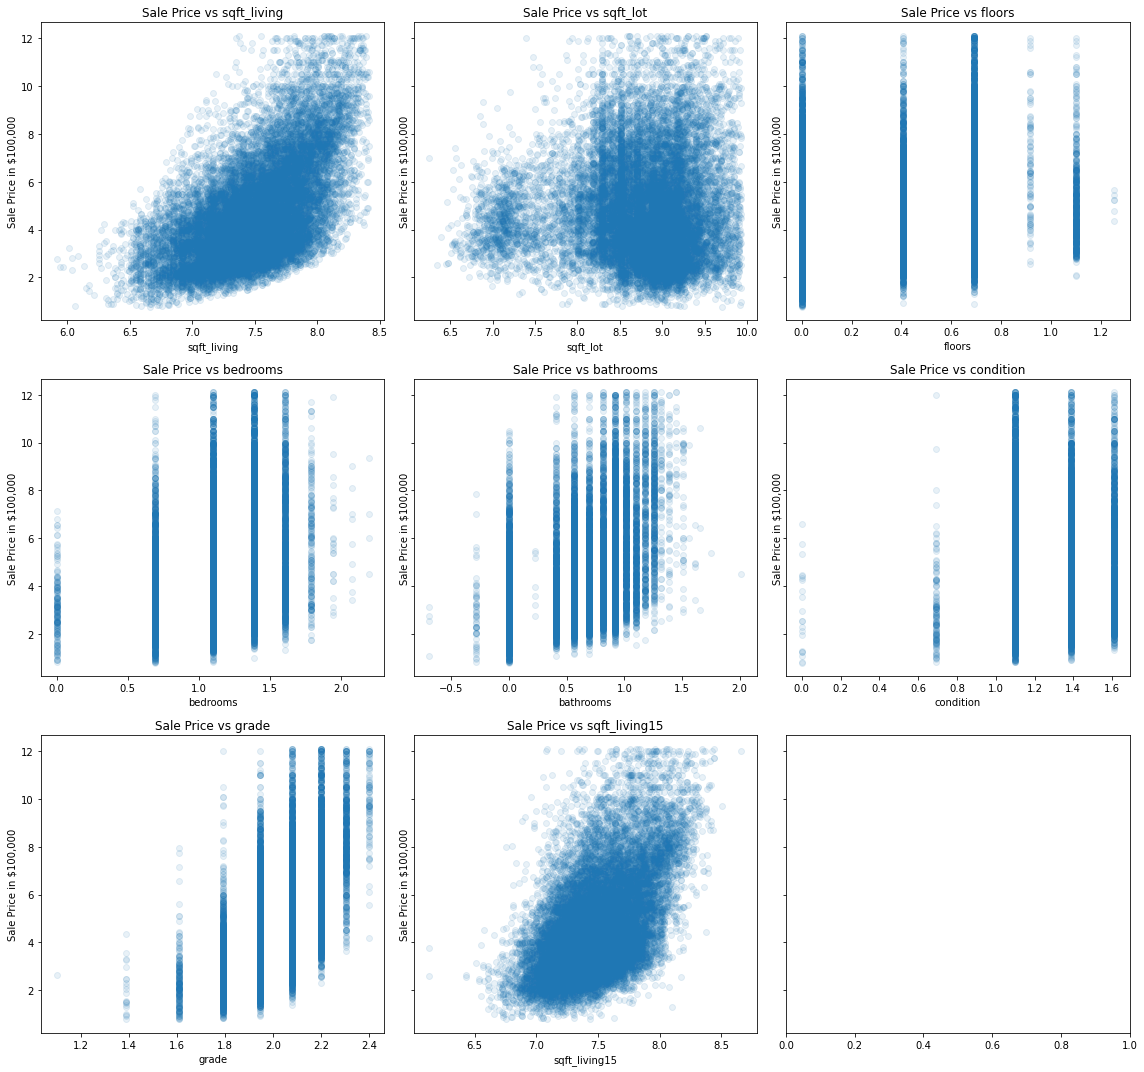

In [443]:
# check linearity

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df_continuous.columns):
    ax.scatter(df_continuous_log[column], df_cleaned['price']/100000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()


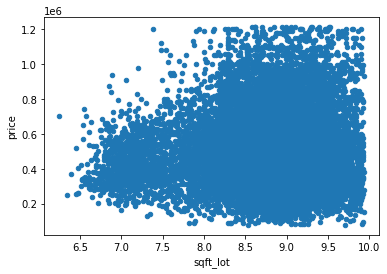

In [444]:
var = 'sqft_lot'
data = pd.concat([df_cleaned['price'], df_continuous_log[var]], axis=1)
data.plot.scatter(x=var, y='price');

# log transforming sqft_lot did not help. This variable simply does not appear to have a linear relationship with our target variable.

In [445]:
# normalize with scikit-learn StandardScaler

scaler = StandardScaler()

#df_standardized = pd.DataFrame(scaler.fit_transform(df_continuous_log),columns = df_continuous_log.columns)
df__continuous_standardized = pd.DataFrame(scaler.fit_transform(df_continuous_log),columns = df_continuous.columns)

In [446]:
df__continuous_standardized

sqft_living  sqft_lot    floors  bedrooms  bathrooms  condition  \
0        -1.070155 -0.185078 -0.922552 -0.225776  -1.678014  -0.618473   
1         0.941946  0.225093  1.041728 -0.225776   0.442551  -0.618473   
2        -2.173615  0.758271 -0.922552 -1.670223  -1.678014  -0.618473   
3         0.241525 -0.387018 -0.922552  0.799076   1.194833   2.218223   
4        -0.156947  0.406011 -0.922552 -0.225776   0.134551  -0.618473   
...            ...       ...       ...       ...        ...        ...   
18476    -0.398706 -2.842895  2.190758 -0.225776   0.718067  -0.618473   
18477     0.666239 -0.138084  1.041728  0.799076   0.718067  -0.618473   
18478    -1.446812 -2.550433  1.041728 -1.670223  -2.430296  -0.618473   
18479    -0.283066 -1.608040  1.041728 -0.225776   0.718067  -0.618473   
18480    -1.446812 -2.925265  1.041728 -1.670223  -2.430296  -0.618473   

          grade  sqft_living15  
0     -0.440909      -0.959349  
1     -0.440909      -0.191355  
2     -1.611484       1.383638  
3     -0.440909      -0.910319  
4      0.573090       0.017335  
...         ...            ...  
18476  0.573090      -0.520518  
18477  0.573090       0.072038  
18478 -0.440909      -1.862398  
18479  0.573090      -0.790830  
18480 -0.440909      -1.862398  

[18481 rows x 8 columns]

## Final Prep for Linear Regression

Our dataframes to combine:
* df_target_log - log transformed target variable (price)
* df_categoricals_processed - one-hot encoded categoricals
* df__continuous_standardized - standardized continuous

In [447]:
# leave out zip_poly, it did NOT improve our model over one-hot-encoding all 70 zips

preprocessed_scaled = pd.concat([df_target_log, df__continuous_standardized, df_categoricals_processed], axis=1)

In [448]:
# preprocessed data ready for linear regression algorithm

preprocessed_scaled

price  sqft_living  sqft_lot    floors  bedrooms  bathrooms  \
0      12.309982    -1.070155 -0.185078 -0.922552 -0.225776  -1.678014   
1      13.195614     0.941946  0.225093  1.041728 -0.225776   0.442551   
2      12.100712    -2.173615  0.758271 -0.922552 -1.670223  -1.678014   
3      13.311329     0.241525 -0.387018 -0.922552  0.799076   1.194833   
4      13.142166    -0.156947  0.406011 -0.922552 -0.225776   0.134551   
...          ...          ...       ...       ...       ...        ...   
18476  12.793859    -0.398706 -2.842895  2.190758 -0.225776   0.718067   
18477  12.899220     0.666239 -0.138084  1.041728  0.799076   0.718067   
18478  12.904459    -1.446812 -2.550433  1.041728 -1.670223  -2.430296   
18479  12.899220    -0.283066 -1.608040  1.041728 -0.225776   0.718067   
18480  12.691580    -1.446812 -2.925265  1.041728 -1.670223  -2.430296   

       condition     grade  sqft_living15  zipcode_98002  zipcode_98003  \
0      -0.618473 -0.440909      -0.959349              0              0   
1      -0.618473 -0.440909      -0.191355              0              0   
2      -0.618473 -1.611484       1.383638              0              0   
3       2.218223 -0.440909      -0.910319              0              0   
4      -0.618473  0.573090       0.017335              0              0   
...          ...       ...            ...            ...            ...   
18476  -0.618473  0.573090      -0.520518              0              0   
18477  -0.618473  0.573090       0.072038              0              0   
18478  -0.618473 -0.440909      -1.862398              0              0   
18479  -0.618473  0.573090      -0.790830              0              0   
18480  -0.618473 -0.440909      -1.862398              0              0   

       zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98008  zipcode_98010  zipcode_98011  zipcode_98014  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98019  zipcode_98022  zipcode_98023  zipcode_98024  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477      

In [449]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [450]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

# Model Evaluations

Steps:
* Divide data into a train/validation set and a test set
* Train our model on the train/validation set
* Validate our model using cv on the train/validation set
* Test our model on our test set

In [451]:
models = {}
models['Models'] = []
models['r2'] = []
models['mae'] = []

## Base Linear Regression Model

Run a base model with no cross-validation or specific feature selection to see our base model scores.

In [452]:
predictors_train = sm.add_constant(X_train_val)
model = sm.OLS(y_train_val, predictors_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     819.0
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:54:33   Log-Likelihood:                 5499.2
No. Observations:               14784   AIC:                        -1.077e+04
Df Residuals:                   14671   BIC:                            -9914.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.5009      0.015    834.346      0.000      12.471      12.530
sqft_living                     0.1375      0.004     35.961      0.000       0.130       0.145
sqft_lot                        0.0574      0.003     20.505      0.000       0.052       0.063
floors                         -0.0053      0.003     -2.092      0.036      -0.010      -0.000
bedrooms                       -0.0089      0.002     -4.537      0.000      -0.013      -0.005
bathrooms                       0.0172      0.003      6.752      0.000       0.012       0.022
condition                       0.0395      0.002     24.645      0.000       0.036       0.043
grade                           0.0922      0.002     38.252      0.000       0.088       0.097
sqft_living15                   0.0579      0.003     20.744      0.000       0.052       0.063
zipcode_98002                   0.0152      0.017      0.883      0.377      -0.019       0.049
zipcode_98003                   0.0554      0.016      3.508      0.000       0.024       0.086
zipcode_98004                   1.0752      0.019     57.248      0.000       1.038       1.112
zipcode_98005                   0.8000      0.021     38.643      0.000       0.759       0.841
zipcode_98006                   0.6856      0.015     46.345      0.000       0.657       0.715
zipcode_98007                   0.6900      0.020     35.192      0.000       0.652       0.728
zipcode_98008                   0.7107      0.016     44.109      0.000       0.679       0.742
zipcode_98010                   0.2576      0.027      9.487      0.000       0.204       0.311
zipcode_98011                   0.4666      0.018     26.142      0.000       0.432       0.502
zipcode_98014                   0.3705      0.030     12.326      0.000       0.312       0.429
zipcode_98019                   0.3184      0.019     16.333      0.000       0.280       0.357
zipcode_98022                   0.0502      0.019      2.605      0.009       0.012       0.088
zipcode_98023                   0.0059      0.014      0.424      0.672      -0.021       0.033
zipcode_98024                   0.3769      0.039      9.642      0.000       0.300       0.453
zipcode_98027                   0.6392      0.016     39.324      0.000       0.607       0.671
zipcode_98028                   0.4367      0.016     27.146      0.000       0.405       0.468
zipcode_98029                   0.6394      0.016     40.937      0.000       0.609       0.670
zipcode_98030                   0.0523      0.016      3.218      0.001       0.020       0.084
zipcode_98031                   0.0877      0.016      5.428      0.000       0.056       0.119
zipcode_98032                   0.0139      0.021      0.671      0.502      -0.027       0.055
zipcode_980

### Study Residuals

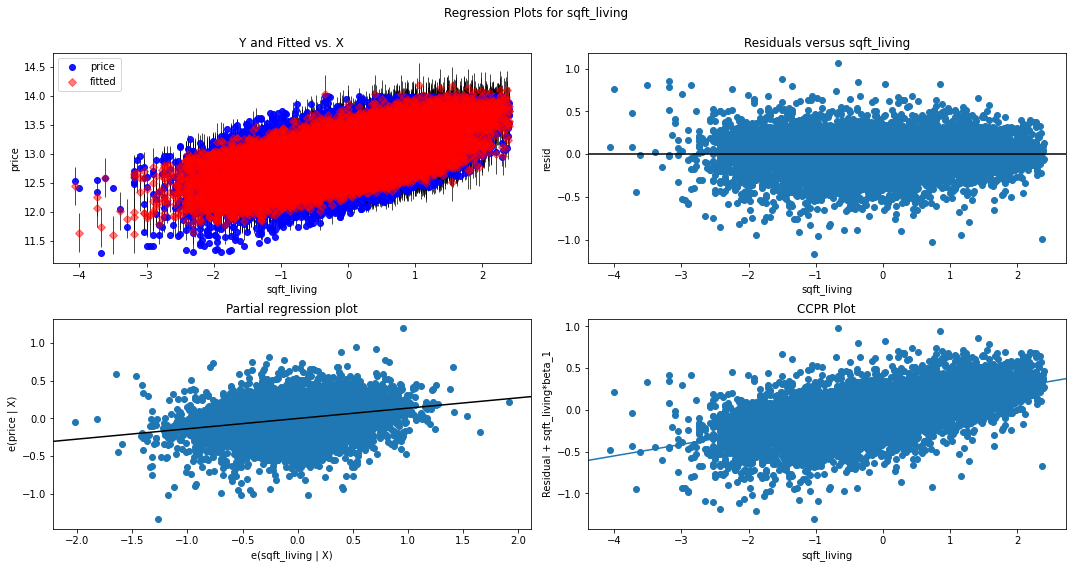

In [453]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

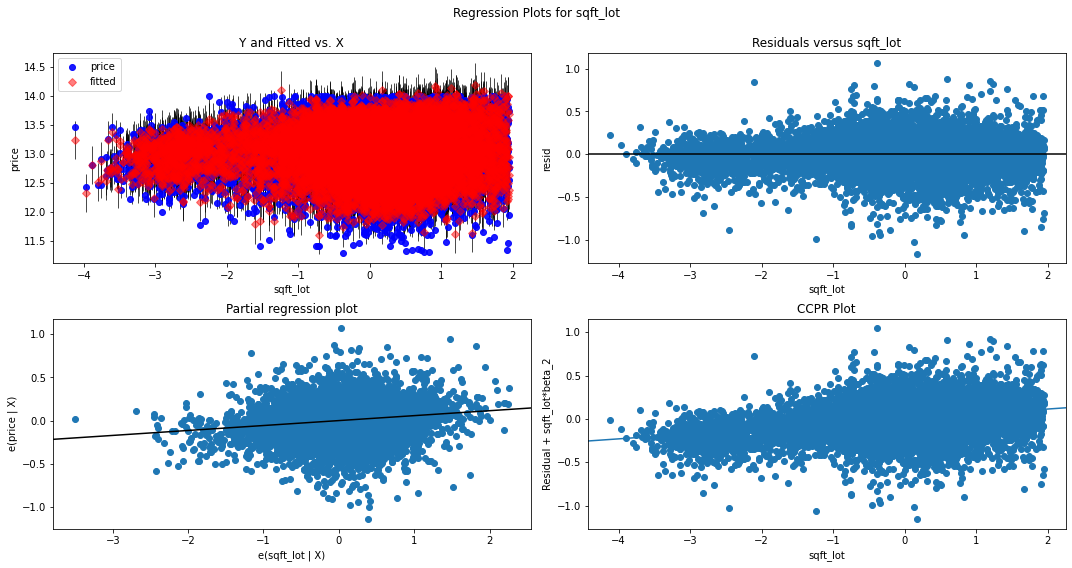

In [454]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

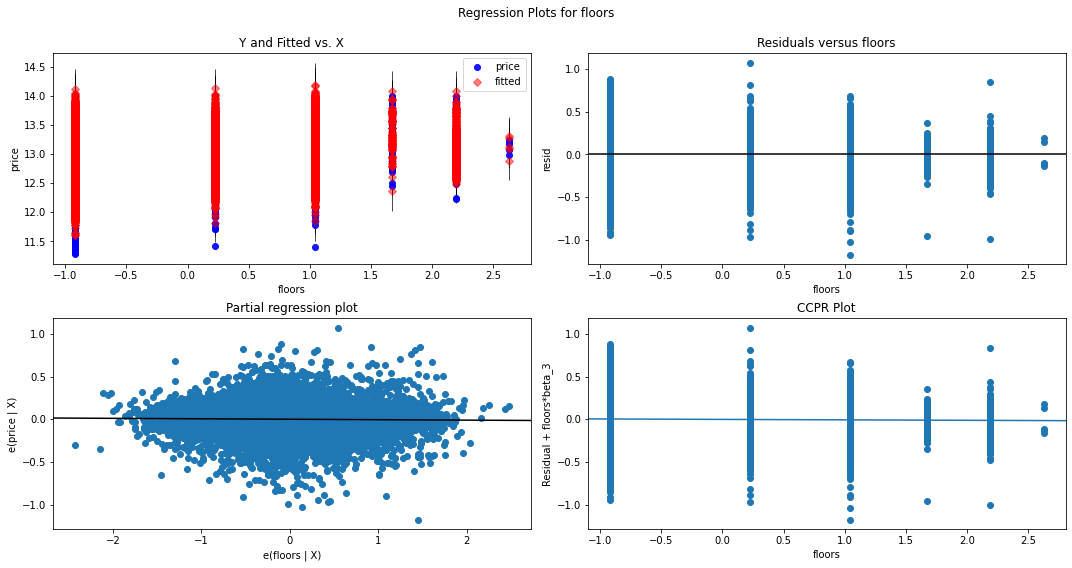

In [455]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "floors", fig=fig)
plt.show()

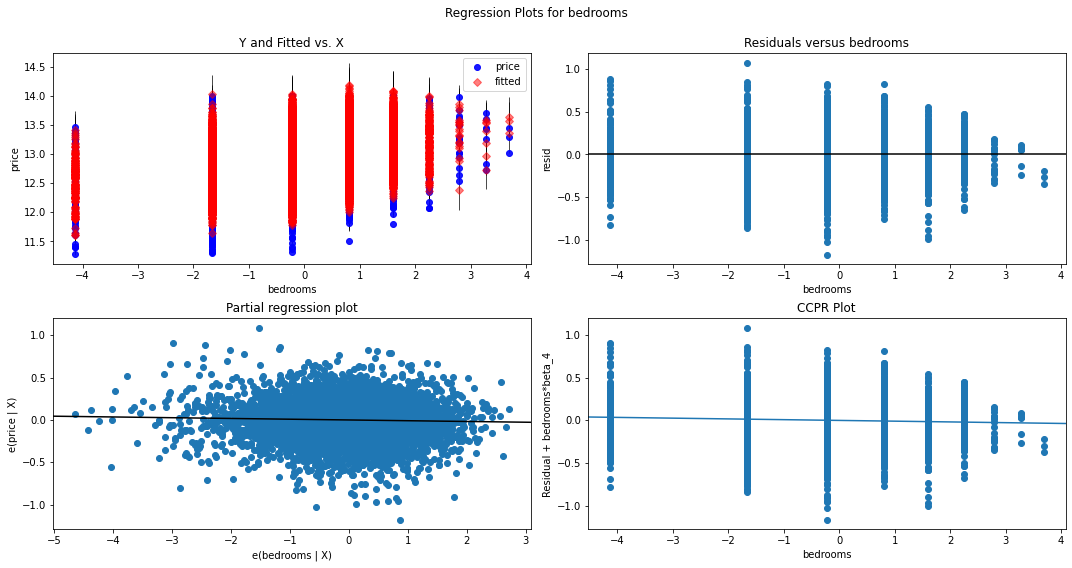

In [456]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

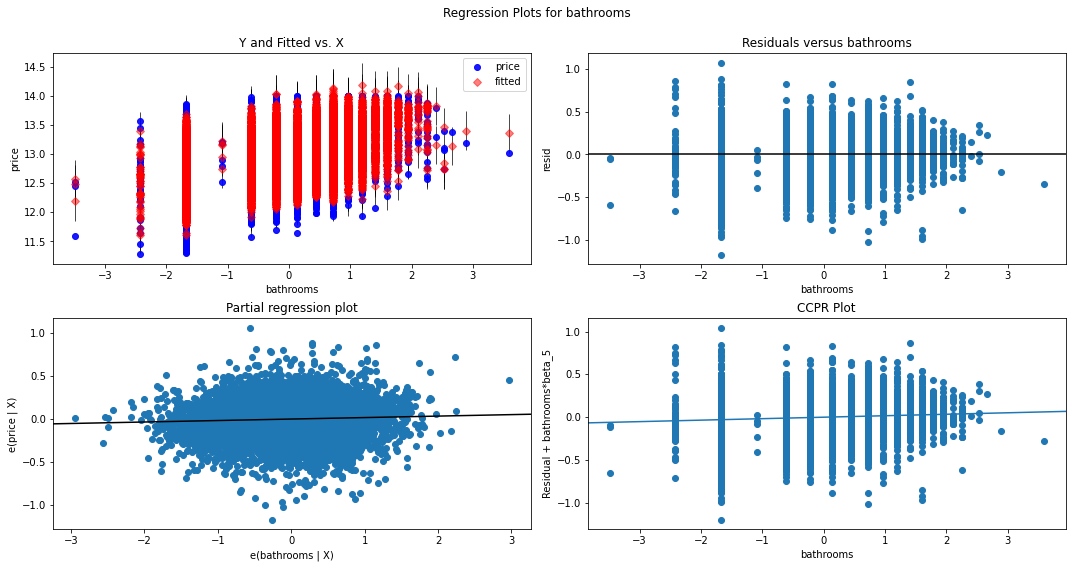

In [457]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

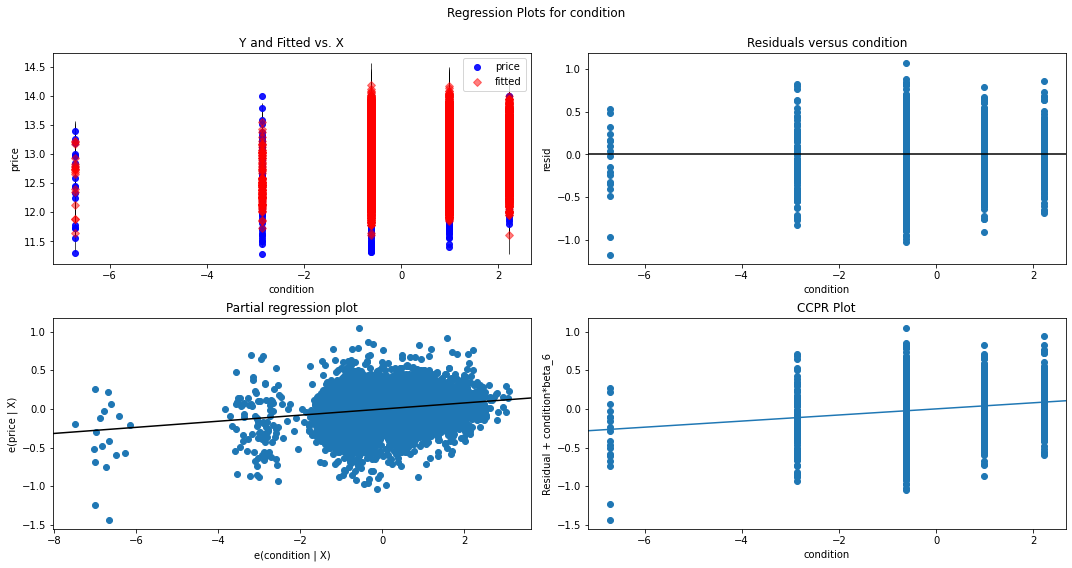

In [458]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

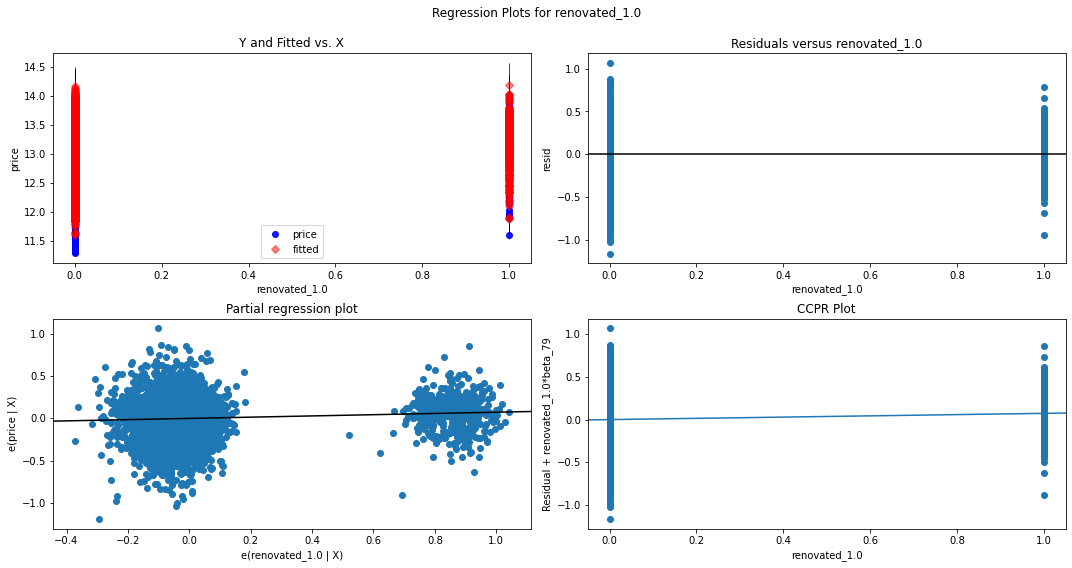

In [459]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "renovated_1.0", fig=fig)
plt.show()

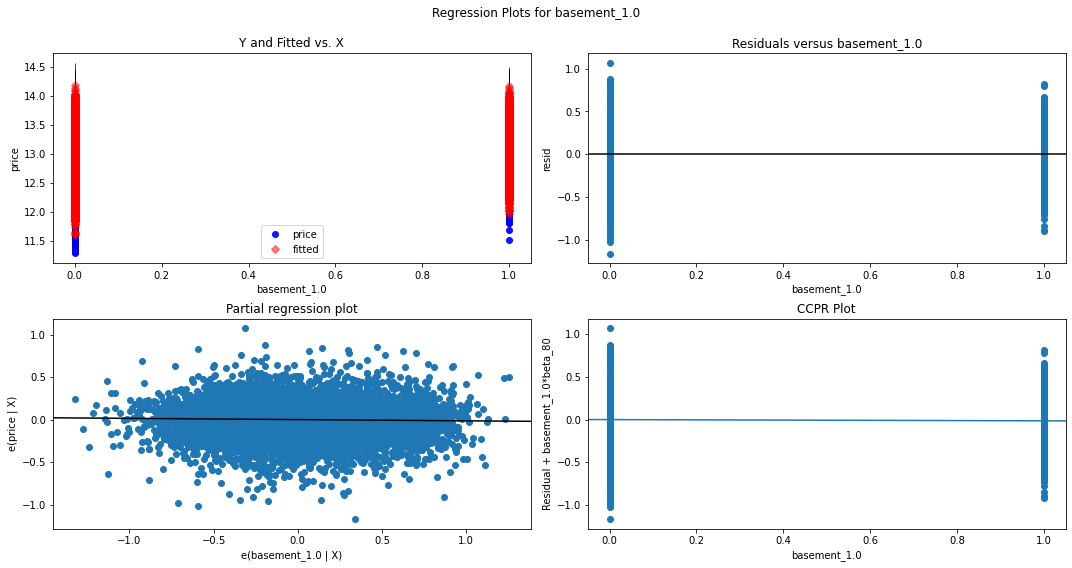

In [460]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "basement_1.0", fig=fig)
plt.show()

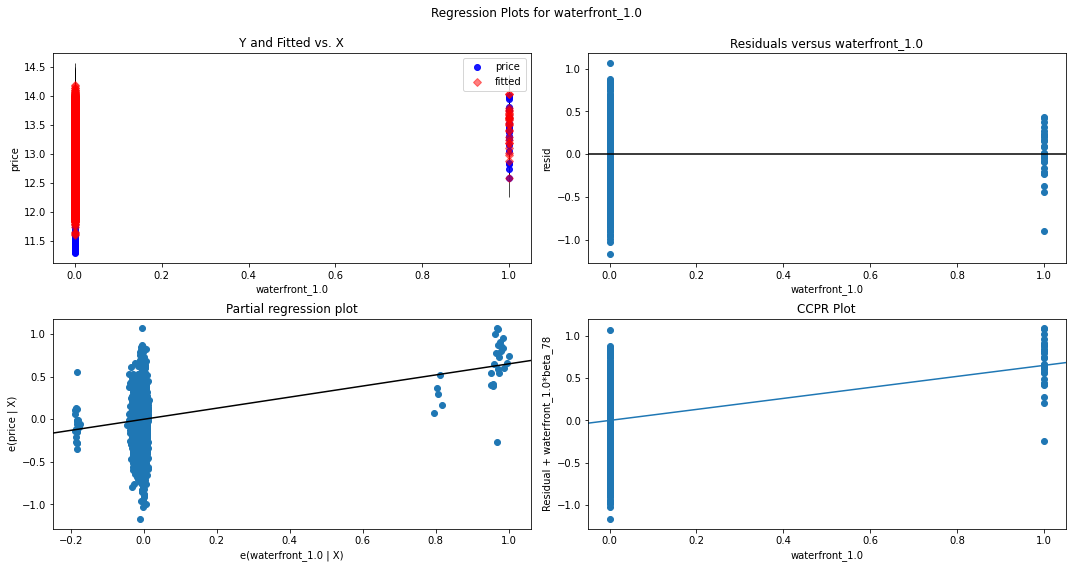

In [461]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "waterfront_1.0", fig=fig)
plt.show()

Perform cross-validation with our model over 5 splits and get our mean R^2.

In [462]:
model = LinearRegression()
model.fit(X_train_val, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2


0.8592610670151919

In [463]:
# How many predictors are in our base model?
print("{} predictors used for this model".format(X.shape[1]))

112 predictors used for this model


In [464]:
# apply our model to our test set and get predicted values
test_predictions = model.predict(X_test)

# reverse log transform our predicted values
test_predictions_unscaled = np.exp(test_predictions)

# compare our predicted values to the actual values
predicted_prices_basiclr = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_unscaled.astype(int)})
predicted_prices_basiclr

Actual  Predicted
9436    271999     288824
9484    232499     172254
1763    234999     259971
14755   424999     404941
7169    374899     361955
...        ...        ...
7049    306500     286554
10452  1199999    1165829
9515    595000     620217
14221   795000     721872
17877   720000     716788

[3697 rows x 2 columns]

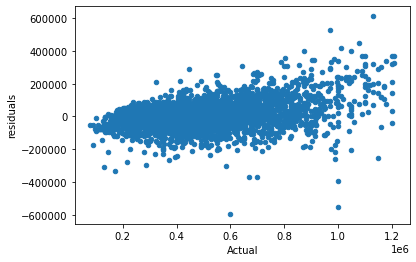

In [465]:
predicted_prices_basiclr["residuals"] = predicted_prices_basiclr["Actual"] - predicted_prices_basiclr["Predicted"]
predicted_prices_basiclr.plot(x = "Actual", y = "residuals",kind = "scatter")

# our residuals show some heteroskedasticity

In [466]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, test_predictions_unscaled), 2)
mae

56457.91

In [467]:
models['Models'].append('Basic LR')
models['r2'].append(r2)
models['mae'].append(mae)

### Find/Add Interactions

I wrote a function which finds all of the feature combinations possible in our dataset. Then for each combination, the function runs a linear regression with cross validation on 5 folds and gets the r^2 score for the regression including that feature combination. All scores are recorded and r^2 score improvement is assessed, with the resulting table giving the increase in model improvement from a feature combo. 

In [473]:
def test_feature_combinations(data):
    
    # select our estimator and our cross validation plan
    regression = LinearRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    
    # prepare our scoring dataframe
    scoring_df = pd.DataFrame()
    
    # prepare our lists to store our features and scores as we iterate
    scores = []
    feature1 = []
    feature2 = []
    
    # Get a list of all of our features, and remove our target variable 'price' from the list
    features = list(data.columns)
    features.remove('price')

    # make a list of all of our possible feature combinations
    feature_combos = itertools.combinations(features, 2)
    feature_combos = list(feature_combos)
    
    # set our y-value as our target variable
    y = data['price']
    
    # prepare our x-value with our independent variables. We do a split here in order to run a linear regression to get a
    # base r^2 on our basic model without interactions
    X = data.drop('price', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
    base_score = round(np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv)), 4)   
    print("Model base score is ",base_score)
    
    # now we run the regression on each feature combo
    for feature in feature_combos:
        feat1, feat2 = feature[0], feature[1]
        
        # create the test interaction on our data set
        data['test_interaction'] = data[feat1] * data[feat2]
        # create a new X which includes the test interaction and drops our target value
        X = data.drop('price', axis=1)
        # make a new split so that our x-splits include the test interaction
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
        
        # Run a linear regression with cross-val just like our base model, and append the score to our scores list
        new_score = round(np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv)), 4)
        scores.append(new_score)
        # put feature 1 on a list
        feature1.append(feat1)
        # put feature 2 on a list
        feature2.append(feat2)
        print(feat1, feat2, new_score)
    
    # load all of our lists into the scoring dataframe
    scoring_df['feature1'] = feature1
    scoring_df['feature2'] = feature2
    scoring_df['scores'] = scores
    scoring_df['improvement'] = scoring_df['scores'] - base_score
    
    # return our scoring dataframe to the function
    return scoring_df

In [474]:
# We ran this script below once and exported the results

interactions_check = pd.concat([df_target_log, df__continuous_standardized], axis=1)
interactions_check
scoring_df = test_feature_combinations(interactions_check)

# we're exporting our interactions results to a csv, because we don't need to run it again
scoring_df.to_csv('interactions.csv')

Model base score is  0.485
sqft_living sqft_lot 0.4849
sqft_living floors 0.4875
sqft_living bedrooms 0.4892
sqft_living bathrooms 0.4912
sqft_living condition 0.487
sqft_living grade 0.4902
sqft_living sqft_living15 0.4849
sqft_lot floors 0.4885
sqft_lot bedrooms 0.4854
sqft_lot bathrooms 0.488
sqft_lot condition 0.4873
sqft_lot grade 0.4858
sqft_lot sqft_living15 0.4864
floors bedrooms 0.4889
floors bathrooms 0.4849
floors condition 0.4912
floors grade 0.4859
floors sqft_living15 0.4859
bedrooms bathrooms 0.4895
bedrooms condition 0.4854
bedrooms grade 0.4892
bedrooms sqft_living15 0.4849
bathrooms condition 0.4893
bathrooms grade 0.4879
bathrooms sqft_living15 0.4853
condition grade 0.4869
condition sqft_living15 0.4894
grade sqft_living15 0.485


In [475]:
scoring_df = pd.read_csv('interactions.csv')

scoring_df.sort_values('improvement', ascending=False)

Unnamed: 0     feature1       feature2  scores  improvement
3            3  sqft_living      bathrooms  0.4912       0.0062
15          15       floors      condition  0.4912       0.0062
5            5  sqft_living          grade  0.4902       0.0052
18          18     bedrooms      bathrooms  0.4895       0.0045
26          26    condition  sqft_living15  0.4894       0.0044
22          22    bathrooms      condition  0.4893       0.0043
2            2  sqft_living       bedrooms  0.4892       0.0042
20          20     bedrooms          grade  0.4892       0.0042
13          13       floors       bedrooms  0.4889       0.0039
7            7     sqft_lot         floors  0.4885       0.0035
9            9     sqft_lot      bathrooms  0.4880       0.0030
23          23    bathrooms          grade  0.4879       0.0029
1            1  sqft_living         floors  0.4875       0.0025
10          10     sqft_lot      condition  0.4873       0.0023
4            4  sqft_living      condition  0.4870       0.0020
25          25    condition          grade  0.4869       0.0019
12          12     sqft_lot  sqft_living15  0.4864       0.0014
17          17       floors  sqft_living15  0.4859       0.0009
16          16       floors          grade  0.4859       0.0009
11          11     sqft_lot          grade  0.4858       0.0008
19          19     bedrooms      condition  0.4854       0.0004
8            8     sqft_lot       bedrooms  0.4854       0.0004
24          24    bathrooms  sqft_living15  0.4853       0.0003
27          27        grade  sqft_living15  0.4850       0.0000
0            0  sqft_living       sqft_lot  0.4849      -0.0001
21          21     bedrooms  sqft_living15  0.4849      -0.0001
6            6  sqft_living  sqft_living15  0.4849      -0.0001
14          14       floors      bathrooms  0.4849      -0.0001

We won't add any interactions.

## Linear Regression - Feature Selectors

### Forward-Backward Selector

First we'll try a simple forward-backward feature selection model based on p-value, using a statsmodel OLS linear regression model.

This model gives us a list of the important features based on their p-value.

In [476]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(X_train_val, y_train_val, verbose=True)

print('resulting features:', result)

Add  grade                          with p-value 0.0
Add  sqft_living                    with p-value 2.03427e-292
Add  zipcode_98023                  with p-value 3.23195e-192
Add  zipcode_98042                  with p-value 9.56937e-138
Add  year_block_(1914.0, 1925.0]    with p-value 2.04352e-127
Add  zipcode_98092                  with p-value 2.81969e-113
Add  zipcode_98004                  with p-value 4.5009e-110
Add  zipcode_98003                  with p-value 4.49462e-110
Add  zipcode_98038                  with p-value 4.28178e-114
Add  year_block_(1925.0, 1939.0]    with p-value 7.43744e-100
Add  zipcode_98030                  with p-value 1.3606e-97
Add  zipcode_98058                  with p-value 4.87218e-99
Add  zipcode_98002                  with p-value 7.21684e-105
Add  zipcode_98031                  with p-value 5.19835e-110
Add  zipcode_98168                  with p-value 1.86934e-111
Add  zipcode_98055                  with p-value 2.87327e-98
Add  zipcode_98198    

In [477]:
# Run our linear regression again, using the features recommended by our feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

predictors_int = sm.add_constant(X_train_refined)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     982.9
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:59:27   Log-Likelihood:                 5469.2
No. Observations:               14784   AIC:                        -1.075e+04
Df Residuals:                   14690   BIC:                        -1.004e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.5060      0.006   2030.660      0.000      12.494      12.518
grade                           0.0914      0.002     39.819      0.000       0.087       0.096
sqft_living                     0.1410      0.003     44.295      0.000       0.135       0.147
zipcode_98023                  -0.0257      0.010     -2.535      0.011      -0.046      -0.006
year_block_(1914.0, 1925.0]     0.0405      0.007      5.868      0.000       0.027       0.054
zipcode_98092                  -0.0347      0.013     -2.642      0.008      -0.060      -0.009
zipcode_98004                   1.0415      0.016     64.666      0.000       1.010       1.073
zipcode_98038                   0.1283      0.010     12.706      0.000       0.109       0.148
year_block_(1925.0, 1939.0]     0.0362      0.007      5.189      0.000       0.023       0.050
condition                       0.0397      0.002     25.904      0.000       0.037       0.043
sqft_living15                   0.0554      0.002     23.798      0.000       0.051       0.060
zipcode_98115                   0.8166      0.010     80.779      0.000       0.797       0.836
zipcode_98103                   0.8469      0.010     82.926      0.000       0.827       0.867
zipcode_98117                   0.8258      0.010     80.057      0.000       0.806       0.846
zipcode_98112                   0.9919      0.016     63.972      0.000       0.962       1.022
zipcode_98119                   0.9699      0.016     59.410      0.000       0.938       1.002
zipcode_98107                   0.8737      0.013     66.070      0.000       0.848       0.900
zipcode_98199                   0.8528      0.013     65.359      0.000       0.827       0.878
zipcode_98105                   0.9047      0.015     59.738      0.000       0.875       0.934
zipcode_98033                   0.7648      0.011     68.954      0.000       0.743       0.787
zipcode_98040                   0.8670      0.016     55.442      0.000       0.836       0.898
zipcode_98116                   0.7808      0.012     63.428      0.000       0.757       0.805
zipcode_98122                   0.8264      0.013     61.633      0.000       0.800       0.853
zipcode_98109                   0.9878      0.021     47.608      0.000       0.947       1.028
waterfront_1.0                  0.6469      0.033     19.478      0.000       0.582       0.712
zipcode_98102                   0.9866      0.021     45.927      0.000       0.945       1.029
zipcode_98136                   0.7116      0.013     53.014      0.000       0.685       0.738
month_4                         0.0804      0.005     17.309      0.000       0.071       0.090
zipcode_98052                   0.6365      0.010     64.054      0.000       0.617       0.656
zipcode_980

In [478]:
print("{} predictors used".format(len(result)))

93 predictors used


In [479]:
model = LinearRegression()
model.fit(X_train_refined, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8590769649849817

In [480]:
# apply our model to our test set and get predicted values
test_predictions_refined = model.predict(X_test_refined)

# reverse log transform our predicted values
test_predictions_refined_unscaled = np.exp(test_predictions_refined)
test_predictions_refined_unscaled

predicted_prices_forwardstep = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_refined_unscaled.astype(int)})
predicted_prices_forwardstep

Actual  Predicted
9436    271999     290205
9484    232499     171490
1763    234999     263631
14755   424999     405914
7169    374899     363841
...        ...        ...
7049    306500     286344
10452  1199999    1172906
9515    595000     611332
14221   795000     713264
17877   720000     719706

[3697 rows x 2 columns]

In [481]:
mae = round(mean_absolute_error(test_actual, test_predictions_refined_unscaled), 2)
mae

56551.77

No change to our model accuracy. The predictors we dropped were clearly trivial.

In [482]:
models['Models'].append('Forw-Back Selector')
models['r2'].append(r2)
models['mae'].append(mae)

### Permutation Importance

Next we will study feature selection via permutation importance, using a sklean LinearRegression model and the library eli5. For permutation importance, each column is individually scrambled, and the resulting error informs the feature weight. If the scramble causes high error in the results, the feature is considered important. If the scramble causes low error, the feature is considered unimportant.

This model gives us a list of important features based on how much error scrambling their columns produces.

In [483]:
import eli5
from eli5.sklearn import PermutationImportance

regressor = LinearRegression()
regressor.fit(X_train_val, y_train_val)

perm = PermutationImportance(regressor, random_state=1).fit(X_train_val, y_train_val)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [484]:
# sorted list of relative feature importance via permutation importance

eli = pd.DataFrame(zip(X.columns.tolist(), perm.feature_importances_))
eli.sort_values(1, ascending=False, inplace=True)
eli.reset_index(inplace=True)
eli.drop('index', axis=1, inplace=True)
eli.tail(30)


0             1
82                 zipcode_98148  7.473705e-04
83   year_block_(1945.0, 1950.0]  6.922802e-04
84                      bedrooms  6.762808e-04
85   year_block_(1939.0, 1945.0]  4.952317e-04
86                  basement_1.0  4.854227e-04
87                 zipcode_98003  4.342188e-04
88                        floors  3.394231e-04
89             comparative_lot_3  3.098900e-04
90                 zipcode_98030  3.002642e-04
91                       month_2  2.508791e-04
92   year_block_(2002.0, 2005.0]  2.388987e-04
93                       month_5  2.208442e-04
94   year_block_(2005.0, 2007.0]  2.067866e-04
95              comparative_sf_3  1.853337e-04
96   year_block_(1914.0, 1925.0]  1.764490e-04
97                       month_9  1.431718e-04
98                 zipcode_98022  1.340876e-04
99                      month_10  1.032798e-04
100  year_block_(1997.0, 2002.0]  5.311453e-05
101  year_block_(1925.0, 1939.0]  4.713146e-05
102                zipcode_98002  2.914324e-05
103  year_block_(2007.0, 2011.0]  2.655517e-05
104                      month_8  2.128566e-05
105                zipcode_98023  9.024373e-06
106                     month_12  8.884714e-06
107                      month_6  7.903368e-06
108                     month_11  5.425301e-06
109                zipcode_98092  5.404804e-06
110                zipcode_98032  3.575203e-06
111                      month_7  4.280856e-07

In [491]:
result_eli5 = list(eli[:80][0])
result_eli5

['zipcode_98103',
 'zipcode_98115',
 'zipcode_98117',
 'sqft_living',
 'zipcode_98033',
 'zipcode_98052',
 'zipcode_98107',
 'zipcode_98199',
 'zipcode_98116',
 'zipcode_98112',
 'zipcode_98122',
 'zipcode_98004',
 'zipcode_98006',
 'zipcode_98034',
 'zipcode_98105',
 'zipcode_98119',
 'grade',
 'zipcode_98144',
 'zipcode_98125',
 'zipcode_98040',
 'zipcode_98126',
 'zipcode_98136',
 'zipcode_98008',
 'zipcode_98074',
 'zipcode_98029',
 'zipcode_98118',
 'zipcode_98133',
 'zipcode_98027',
 'zipcode_98053',
 'zipcode_98109',
 'zipcode_98155',
 'zipcode_98102',
 'zipcode_98075',
 'zipcode_98177',
 'zipcode_98005',
 'zipcode_98007',
 'sqft_living15',
 'sqft_lot',
 'zipcode_98065',
 'zipcode_98106',
 'zipcode_98028',
 'zipcode_98059',
 'zipcode_98056',
 'zipcode_98011',
 'zipcode_98072',
 'zipcode_98108',
 'condition',
 'zipcode_98146',
 'zipcode_98166',
 'waterfront_1.0',
 'zipcode_98019',
 'zipcode_98058',
 'zipcode_98038',
 'zipcode_98077',
 'zipcode_98178',
 'zipcode_98045',
 'year_blo

In [492]:
# Run our linear regression again, using the features recommended by our feature selector

X_eli5 = X_train_val[result_eli5]

predictors_int = sm.add_constant(X_eli5)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1125.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:00:12   Log-Likelihood:                 5362.4
No. Observations:               14784   AIC:                        -1.056e+04
Df Residuals:                   14703   BIC:                            -9947.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.5210      0.005   2709.464      0.000      12.512      12.530
zipcode_98103                   0.8420      0.009     90.389      0.000       0.824       0.860
zipcode_98115                   0.8100      0.009     88.173      0.000       0.792       0.828
zipcode_98117                   0.8212      0.009     87.340      0.000       0.803       0.840
sqft_living                     0.1326      0.003     47.734      0.000       0.127       0.138
zipcode_98033                   0.7601      0.010     72.678      0.000       0.740       0.781
zipcode_98052                   0.6339      0.009     69.128      0.000       0.616       0.652
zipcode_98107                   0.8633      0.013     68.673      0.000       0.839       0.888
zipcode_98199                   0.8426      0.012     68.427      0.000       0.819       0.867
zipcode_98116                   0.7734      0.012     66.639      0.000       0.751       0.796
zipcode_98112                   0.9880      0.015     66.340      0.000       0.959       1.017
zipcode_98122                   0.8153      0.013     63.928      0.000       0.790       0.840
zipcode_98004                   1.0346      0.016     65.819      0.000       1.004       1.065
zipcode_98006                   0.6482      0.011     61.075      0.000       0.627       0.669
zipcode_98034                   0.5461      0.009     58.635      0.000       0.528       0.564
zipcode_98105                   0.8984      0.015     61.863      0.000       0.870       0.927
zipcode_98119                   0.9618      0.016     60.972      0.000       0.931       0.993
grade                           0.0925      0.002     41.340      0.000       0.088       0.097
zipcode_98144                   0.6692      0.012     55.710      0.000       0.646       0.693
zipcode_98125                   0.5652      0.010     54.177      0.000       0.545       0.586
zipcode_98040                   0.8635      0.015     56.697      0.000       0.834       0.893
zipcode_98126                   0.5840      0.011     53.005      0.000       0.562       0.606
zipcode_98136                   0.7067      0.013     55.303      0.000       0.682       0.732
zipcode_98008                   0.6735      0.012     54.362      0.000       0.649       0.698
zipcode_98074                   0.5494      0.011     51.765      0.000       0.529       0.570
zipcode_98029                   0.5999      0.012     51.408      0.000       0.577       0.623
zipcode_98118                   0.4597      0.009     48.544      0.000       0.441       0.478
zipcode_98133                   0.4503      0.009     47.570      0.000       0.432       0.469
zipcode_98027                   0.6013      0.013     47.860      0.000       0.577       0.626
zipcode_980

In [493]:
model = LinearRegression()
model.fit(X_eli5, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_eli5, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8574037428136924

In [494]:
X_test_eli5 = X_test[result_eli5]

eli5_predictions = model.predict(X_test_eli5)

eli5_predictions_unscaled = np.exp(eli5_predictions)
eli5_predictions_unscaled

predicted_prices_eli5 = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": eli5_predictions_unscaled.astype(int)})
predicted_prices_eli5

Actual  Predicted
9436    271999     302166
9484    232499     179141
1763    234999     266637
14755   424999     410970
7169    374899     368226
...        ...        ...
7049    306500     280920
10452  1199999    1162855
9515    595000     624302
14221   795000     710524
17877   720000     709675

[3697 rows x 2 columns]

In [495]:
mae = round(mean_absolute_error(test_actual, eli5_predictions_unscaled), 2)
mae

56846.72

In [496]:
models['Models'].append('Permutation Importance')
models['r2'].append(r2)
models['mae'].append(mae)

### Recursive Feature Elimination with Cross Validation - Linear Regression

In [497]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='r2')

rfecv.fit(X_train_val, y_train_val)

RFECV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
      estimator=LinearRegression(), scoring='r2')

In [498]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 112


In [499]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

dset

attr  used
0                    sqft_living  True
1                       sqft_lot  True
2                         floors  True
3                       bedrooms  True
4                      bathrooms  True
..                           ...   ...
107  year_block_(1997.0, 2002.0]  True
108  year_block_(2002.0, 2005.0]  True
109  year_block_(2005.0, 2007.0]  True
110  year_block_(2007.0, 2011.0]  True
111  year_block_(2011.0, 2015.0]  True

[112 rows x 2 columns]

In [500]:
results = pd.DataFrame()
results['attr'] = X.columns
results['used'] = rfecv.support_

rfecv_result = list(dset[(dset['used'] == True)]['attr'])
rfecv_result

['sqft_living',
 'sqft_lot',
 'floors',
 'bedrooms',
 'bathrooms',
 'condition',
 'grade',
 'sqft_living15',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode

In [514]:
r2 = rfecv.grid_scores_[rfecv.n_features_-1]
r2

IndexError: index 112 is out of bounds for axis 0 with size 112

In [502]:
# Run our linear regression again, using the features recommended by our feature selector

X_train_rfecv = X_train_val[rfecv_result]
X_test_rfecv = X_test[rfecv_result]

predictors_int = sm.add_constant(X_train_rfecv)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     819.0
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:00:53   Log-Likelihood:                 5499.2
No. Observations:               14784   AIC:                        -1.077e+04
Df Residuals:                   14671   BIC:                            -9914.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.5009      0.015    834.346      0.000      12.471      12.530
sqft_living                     0.1375      0.004     35.961      0.000       0.130       0.145
sqft_lot                        0.0574      0.003     20.505      0.000       0.052       0.063
floors                         -0.0053      0.003     -2.092      0.036      -0.010      -0.000
bedrooms                       -0.0089      0.002     -4.537      0.000      -0.013      -0.005
bathrooms                       0.0172      0.003      6.752      0.000       0.012       0.022
condition                       0.0395      0.002     24.645      0.000       0.036       0.043
grade                           0.0922      0.002     38.252      0.000       0.088       0.097
sqft_living15                   0.0579      0.003     20.744      0.000       0.052       0.063
zipcode_98002                   0.0152      0.017      0.883      0.377      -0.019       0.049
zipcode_98003                   0.0554      0.016      3.508      0.000       0.024       0.086
zipcode_98004                   1.0752      0.019     57.248      0.000       1.038       1.112
zipcode_98005                   0.8000      0.021     38.643      0.000       0.759       0.841
zipcode_98006                   0.6856      0.015     46.345      0.000       0.657       0.715
zipcode_98007                   0.6900      0.020     35.192      0.000       0.652       0.728
zipcode_98008                   0.7107      0.016     44.109      0.000       0.679       0.742
zipcode_98010                   0.2576      0.027      9.487      0.000       0.204       0.311
zipcode_98011                   0.4666      0.018     26.142      0.000       0.432       0.502
zipcode_98014                   0.3705      0.030     12.326      0.000       0.312       0.429
zipcode_98019                   0.3184      0.019     16.333      0.000       0.280       0.357
zipcode_98022                   0.0502      0.019      2.605      0.009       0.012       0.088
zipcode_98023                   0.0059      0.014      0.424      0.672      -0.021       0.033
zipcode_98024                   0.3769      0.039      9.642      0.000       0.300       0.453
zipcode_98027                   0.6392      0.016     39.324      0.000       0.607       0.671
zipcode_98028                   0.4367      0.016     27.146      0.000       0.405       0.468
zipcode_98029                   0.6394      0.016     40.937      0.000       0.609       0.670
zipcode_98030                   0.0523      0.016      3.218      0.001       0.020       0.084
zipcode_98031                   0.0877      0.016      5.428      0.000       0.056       0.119
zipcode_98032                   0.0139      0.021      0.671      0.502      -0.027       0.055
zipcode_980

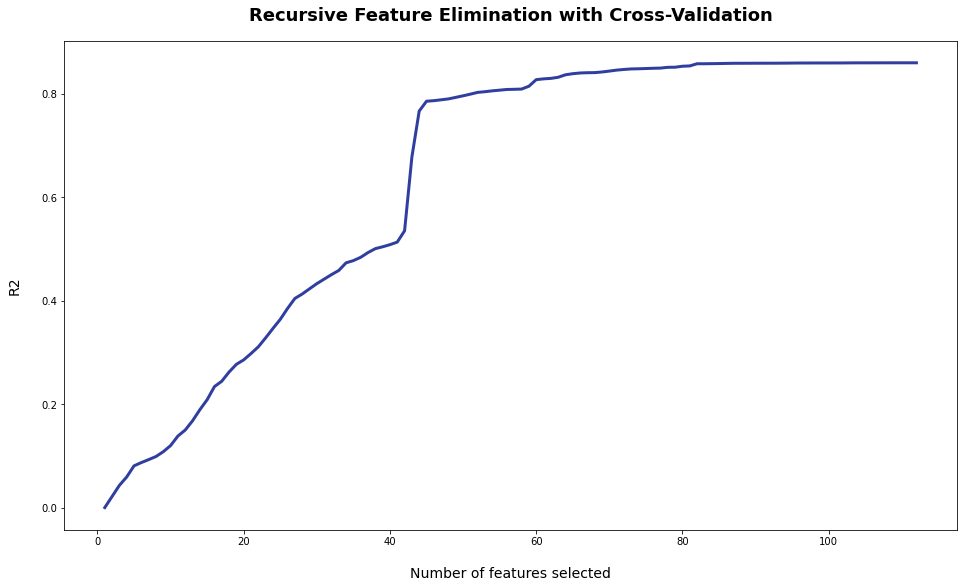

In [503]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('R2', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [504]:
rfecv_predictions = rfecv.predict(X_test)

rfecv_predictions_unscaled = np.exp(rfecv_predictions)
rfecv_predictions_unscaled

predicted_prices_rfecv = pd.DataFrame({"price": test_actual.astype(int), "lr_predicted": rfecv_predictions_unscaled.astype(int)})

predicted_prices_rfecv

price  lr_predicted
9436    271999        288824
9484    232499        172254
1763    234999        259971
14755   424999        404941
7169    374899        361955
...        ...           ...
7049    306500        286554
10452  1199999       1165829
9515    595000        620217
14221   795000        721872
17877   720000        716788

[3697 rows x 2 columns]

In [505]:
mae = round(mean_absolute_error(test_actual, rfecv_predictions_unscaled), 2)
mae

56457.91

In [506]:
models['Models'].append('RFECV')
models['r2'].append(r2)
models['mae'].append(mae)

### Visualizing R2 at different features selected (OLS LR)

>70 0.843 (0.006)
>71 0.845 (0.005)
>72 0.847 (0.005)
>73 0.848 (0.005)
>74 0.848 (0.005)
>75 0.848 (0.005)
>76 0.849 (0.005)
>77 0.849 (0.005)
>78 0.851 (0.005)
>79 0.851 (0.005)
>80 0.852 (0.005)
>81 0.853 (0.005)
>82 0.858 (0.005)
>83 0.858 (0.005)
>84 0.858 (0.005)
>85 0.858 (0.005)
>86 0.858 (0.005)
>87 0.858 (0.005)
>88 0.858 (0.005)
>89 0.858 (0.005)
>90 0.859 (0.005)
>91 0.859 (0.005)
>92 0.859 (0.005)
>93 0.859 (0.005)
>94 0.859 (0.005)
>95 0.859 (0.005)
>96 0.859 (0.005)
>97 0.859 (0.005)
>98 0.859 (0.005)
>99 0.859 (0.005)
>100 0.859 (0.005)
>101 0.859 (0.005)
>102 0.859 (0.005)
>103 0.859 (0.005)
>104 0.859 (0.005)
>105 0.859 (0.005)
>106 0.859 (0.005)
>107 0.859 (0.005)
>108 0.859 (0.005)
>109 0.859 (0.005)
>110 0.859 (0.005)
>111 0.859 (0.005)
>112 0.859 (0.005)


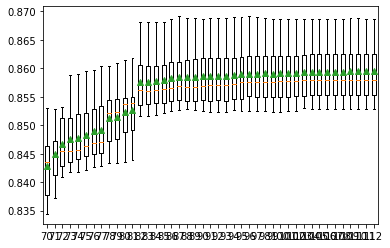

In [508]:
# explore the number of selected features for RFE

# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

# get a list of these_models to evaluate
def get_these_models():
    these_models = dict()
    for i in range(70, 113):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        model = LinearRegression()
        these_models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return these_models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

these_models = get_these_models()
# evaluate the these_models and store results
results, names = list(), list()
for name, model in these_models.items():
    scores = evaluate_model(model, X_train_val, y_train_val)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    # plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Custom LAD Regression Model

Least Absolute Deviations model (uses MAE to optimize model)

In [ ]:
# Run our custom LAD regression, using the features recommended by our feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

In [509]:
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class LADRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        d = X.shape[1]
        mae_loss = lambda coefs: np.mean(np.abs(y - X@coefs[:-1] - coefs[-1]))
        *self.coef_, self.intercept_ = minimize(mae_loss, x0=np.array((d+1)*[0.])).x # the heavy lifting
        
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return X@self.coef_ + self.intercept_

In [524]:
model = LADRegression()

model.fit(X_train_refined, y_train_val)

LADRegression()

In [525]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8577791302442449

In [526]:
predictions_LAD = model.predict(X_test_refined)
predictions_LAD_unscaled = np.exp(predictions_LAD)

In [527]:
mae = round(mean_absolute_error(test_actual, predictions_LAD_unscaled), 2)
mae

56562.34

In [528]:
models['Models'].append('LAD Regression')
models['r2'].append(r2)
models['mae'].append(mae)

## SVR

In [529]:
# Linear Support vector regression
from sklearn.svm import SVR

svr = SVR()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
scores = cross_val_score(svr, X_train_val, y_train_val, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
r2 = np.mean(scores)
r2

0.8434631235898802

In [530]:
svr.fit(X_train_val, y_train_val)
predictions_SVR = svr.predict(X_test)
predictions_SVR_unscaled = np.exp(predictions_SVR)

In [531]:
mae = round(mean_absolute_error(test_actual, predictions_SVR_unscaled), 2)
mae

57313.08

In [532]:
models['Models'].append('SVR')
models['r2'].append(r2)
models['mae'].append(mae)

## Elastic Net Regression

In [533]:
# Elastic Net regression

from sklearn.linear_model import ElasticNetCV

elasticnet = ElasticNetCV(alphas = [1, 0.1, 0.001, 0.0005], cv=5, random_state=0)
elasticnet.fit(X_train_val, y_train_val)
r2 = elasticnet.score(X_train_val, y_train_val)
r2

0.8454984360565736

In [534]:
predictions_elastic = elasticnet.predict(X_test)
predictions_elastic_unscaled = np.exp(predictions_elastic)

In [535]:
mae = round(mean_absolute_error(test_actual, predictions_elastic_unscaled), 2)
mae

59770.91

In [536]:
models['Models'].append('Elastic Net')
models['r2'].append(r2)
models['mae'].append(mae)

## Lasso Regression

In [537]:
def r2_cv(model):
    r2= np.sqrt(-cross_val_score(model, X_train_val, y_train_val, scoring="r2", cv = 5))
    return(r2)

lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], cv=5, random_state=0)
lasso.fit(X_train_val, y_train_val)
r2_cv(lasso).mean()
r2 = lasso.score(X_train_val, y_train_val)
r2

0.8373992711774374

In [538]:
coef = pd.Series(lasso.coef_, index = X_train_val.columns)

In [539]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 93 variables and eliminated the other 19 variables


In [540]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

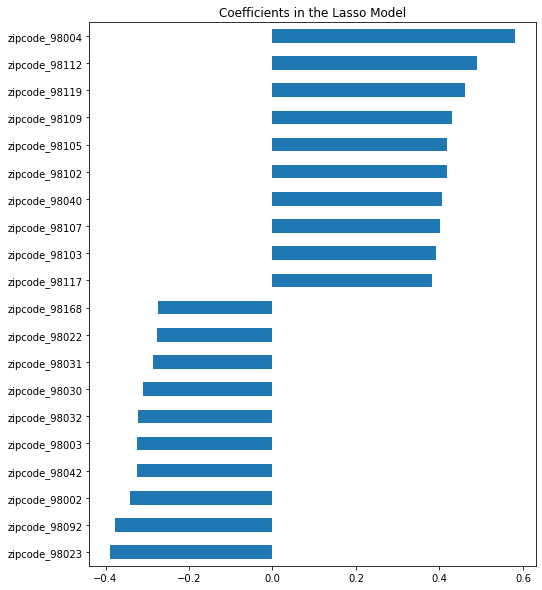

In [541]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [542]:
predictions_lasso = lasso.predict(X_test)
predictions_lasso_unscaled = np.exp(predictions_lasso)

In [543]:
mae = round(mean_absolute_error(test_actual, predictions_lasso_unscaled), 2)
mae

61497.28

In [544]:
models['Models'].append('Lasso')
models['r2'].append(r2)
models['mae'].append(mae)

## KNN Model

In [545]:
rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    
    # set up the KNN regressor
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_val, y_train_val)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.11046748186393077
RMSE value for k=  2 is: 0.08163932588334835
RMSE value for k=  3 is: 0.07295711997093221
RMSE value for k=  4 is: 0.07076385100753266
RMSE value for k=  5 is: 0.06874107196374796
RMSE value for k=  6 is: 0.06745784116519898
RMSE value for k=  7 is: 0.06637518878976295
RMSE value for k=  8 is: 0.06653592897448576
RMSE value for k=  9 is: 0.06600642568791949
RMSE value for k=  10 is: 0.06523448023412343
RMSE value for k=  11 is: 0.06549622101089593
RMSE value for k=  12 is: 0.06542183292523485
RMSE value for k=  13 is: 0.06536042846258773
RMSE value for k=  14 is: 0.0654005841769998
RMSE value for k=  15 is: 0.06598574594971554
RMSE value for k=  16 is: 0.06606385319792175
RMSE value for k=  17 is: 0.06639155868967252
RMSE value for k=  18 is: 0.06666668440667407
RMSE value for k=  19 is: 0.06694818504601745
RMSE value for k=  20 is: 0.06715055183742735


In [546]:
index_min = np.argmin(rmse_val) + 1

In [547]:
model = neighbors.KNeighborsRegressor(n_neighbors = index_min)
model.fit(X_train_val, y_train_val)  #fit the model
pred_knn = model.predict(X_test) #make prediction on test set
pred_knn = np.exp(pred_knn)

In [548]:
scores = cross_val_score(model, X_train_val, y_train_val, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
r2 = np.mean(scores)
r2

0.6784655233220797

In [549]:
mae = round(mean_absolute_error(test_actual, pred_knn), 2)
mae

86432.8

In [550]:
models['Models'].append('KNN')
models['r2'].append(r2)
models['mae'].append(mae)

## Gradient Boosting Regressor

To work with a boosted regressor, we're going to roll back some of our one-hot encoding and bring those elements back to categories. We also don't need to standardize our continuous features with this model. Let's check out what we need to roll back.

In [552]:
preprocessed_scaled

price  sqft_living  sqft_lot    floors  bedrooms  bathrooms  \
0      12.309982    -1.070155 -0.185078 -0.922552 -0.225776  -1.678014   
1      13.195614     0.941946  0.225093  1.041728 -0.225776   0.442551   
2      12.100712    -2.173615  0.758271 -0.922552 -1.670223  -1.678014   
3      13.311329     0.241525 -0.387018 -0.922552  0.799076   1.194833   
4      13.142166    -0.156947  0.406011 -0.922552 -0.225776   0.134551   
...          ...          ...       ...       ...       ...        ...   
18476  12.793859    -0.398706 -2.842895  2.190758 -0.225776   0.718067   
18477  12.899220     0.666239 -0.138084  1.041728  0.799076   0.718067   
18478  12.904459    -1.446812 -2.550433  1.041728 -1.670223  -2.430296   
18479  12.899220    -0.283066 -1.608040  1.041728 -0.225776   0.718067   
18480  12.691580    -1.446812 -2.925265  1.041728 -1.670223  -2.430296   

       condition     grade  sqft_living15  zipcode_98002  zipcode_98003  \
0      -0.618473 -0.440909      -0.959349              0              0   
1      -0.618473 -0.440909      -0.191355              0              0   
2      -0.618473 -1.611484       1.383638              0              0   
3       2.218223 -0.440909      -0.910319              0              0   
4      -0.618473  0.573090       0.017335              0              0   
...          ...       ...            ...            ...            ...   
18476  -0.618473  0.573090      -0.520518              0              0   
18477  -0.618473  0.573090       0.072038              0              0   
18478  -0.618473 -0.440909      -1.862398              0              0   
18479  -0.618473  0.573090      -0.790830              0              0   
18480  -0.618473 -0.440909      -1.862398              0              0   

       zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98008  zipcode_98010  zipcode_98011  zipcode_98014  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98019  zipcode_98022  zipcode_98023  zipcode_98024  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477      

We're going to roll back zipcode into a single column categorical. We'll use age blocks still, but in-column. We're still going to use month as a categorical.

In [554]:
df_boost = df_categoricals[categoricals]

In [555]:
df_boost

price  yr_built  month  zipcode  waterfront  renovated  basement  \
0      221900.0      1955     10    98178         0.0        0.0       0.0   
1      538000.0      1951     12    98125         0.0        1.0       1.0   
2      180000.0      1933      2    98028         0.0        0.0       0.0   
3      604000.0      1965     12    98136         0.0        0.0       1.0   
4      510000.0      1987      2    98074         0.0        0.0       0.0   
...         ...       ...    ...      ...         ...        ...       ...   
18476  360000.0      2009      5    98103         0.0        0.0       0.0   
18477  400000.0      2014      2    98146         0.0        0.0       0.0   
18478  402101.0      2009      6    98144         0.0        0.0       0.0   
18479  400000.0      2004      1    98027         0.0        0.0       0.0   
18480  325000.0      2008     10    98144         0.0        0.0       0.0   

      comparative_sf comparative_lot  
0                  2               2  
1                  3               2  
2                  2               2  
3                  3               2  
4                  2               2  
...              ...             ...  
18476              2               2  
18477              3               2  
18478              2               2  
18479              2               3  
18480              2               2  

[18481 rows x 9 columns]

In [556]:
df_boost['age_group'] = np.ceil((2015 - df_boost['yr_built'])/4)

In [557]:
df_boost

price  yr_built  month  zipcode  waterfront  renovated  basement  \
0      221900.0      1955     10    98178         0.0        0.0       0.0   
1      538000.0      1951     12    98125         0.0        1.0       1.0   
2      180000.0      1933      2    98028         0.0        0.0       0.0   
3      604000.0      1965     12    98136         0.0        0.0       1.0   
4      510000.0      1987      2    98074         0.0        0.0       0.0   
...         ...       ...    ...      ...         ...        ...       ...   
18476  360000.0      2009      5    98103         0.0        0.0       0.0   
18477  400000.0      2014      2    98146         0.0        0.0       0.0   
18478  402101.0      2009      6    98144         0.0        0.0       0.0   
18479  400000.0      2004      1    98027         0.0        0.0       0.0   
18480  325000.0      2008     10    98144         0.0        0.0       0.0   

      comparative_sf comparative_lot  age_group  
0                  2               2       15.0  
1                  3               2       16.0  
2                  2               2       21.0  
3                  3               2       13.0  
4                  2               2        7.0  
...              ...             ...        ...  
18476              2               2        2.0  
18477              3               2        1.0  
18478              2               2        2.0  
18479              2               3        3.0  
18480              2               2        2.0  

[18481 rows x 10 columns]

In [558]:
categorical = ['zipcode', 'waterfront', 'renovated', 'basement', 'comparative_sf', 'comparative_lot', 'month', 'age_group']

df_boost_processed = df_boost[categorical]

# tagging all of these things as categoricals
for item in categorical:
    df_boost_processed[item] = df_boost_processed[item].astype('category')


In [559]:
df_boost_processed

zipcode waterfront renovated basement comparative_sf comparative_lot  \
0       98178        0.0       0.0      0.0              2               2   
1       98125        0.0       1.0      1.0              3               2   
2       98028        0.0       0.0      0.0              2               2   
3       98136        0.0       0.0      1.0              3               2   
4       98074        0.0       0.0      0.0              2               2   
...       ...        ...       ...      ...            ...             ...   
18476   98103        0.0       0.0      0.0              2               2   
18477   98146        0.0       0.0      0.0              3               2   
18478   98144        0.0       0.0      0.0              2               2   
18479   98027        0.0       0.0      0.0              2               3   
18480   98144        0.0       0.0      0.0              2               2   

      month age_group  
0        10      15.0  
1        12      16.0  
2         2      21.0  
3        12      13.0  
4         2       7.0  
...     ...       ...  
18476     5       2.0  
18477     2       1.0  
18478     6       2.0  
18479     1       3.0  
18480    10       2.0  

[18481 rows x 8 columns]

In [560]:
boost_processed = pd.concat([df_target_log, df_continuous, df_boost_processed], axis=1)

In [561]:
boost_processed

price  sqft_living  sqft_lot  floors  bedrooms  bathrooms  \
0      12.309982         1180      5650     1.0       3.0       1.00   
1      13.195614         2570      7242     2.0       3.0       2.25   
2      12.100712          770     10000     1.0       2.0       1.00   
3      13.311329         1960      5000     1.0       4.0       3.00   
4      13.142166         1680      8080     1.0       3.0       2.00   
...          ...          ...       ...     ...       ...        ...   
18476  12.793859         1530      1131     3.0       3.0       2.50   
18477  12.899220         2310      5813     2.0       4.0       2.50   
18478  12.904459         1020      1350     2.0       2.0       0.75   
18479  12.899220         1600      2388     2.0       3.0       2.50   
18480  12.691580         1020      1076     2.0       2.0       0.75   

       condition  grade  sqft_living15 zipcode waterfront renovated basement  \
0              3      7           1340   98178        0.0       0.0      0.0   
1              3      7           1690   98125        0.0       1.0      1.0   
2              3      6           2720   98028        0.0       0.0      0.0   
3              5      7           1360   98136        0.0       0.0      1.0   
4              3      8           1800   98074        0.0       0.0      0.0   
...          ...    ...            ...     ...        ...       ...      ...   
18476          3      8           1530   98103        0.0       0.0      0.0   
18477          3      8           1830   98146        0.0       0.0      0.0   
18478          3      7           1020   98144        0.0       0.0      0.0   
18479          3      8           1410   98027        0.0       0.0      0.0   
18480          3      7           1020   98144        0.0       0.0      0.0   

      comparative_sf comparative_lot month age_group  
0                  2               2    10      15.0  
1                  3               2    12      16.0  
2                  2               2     2      21.0  
3                  3               2    12      13.0  
4                  2               2     2       7.0  
...              ...             ...   ...       ...  
18476              2               2     5       2.0  
18477              3               2     2       1.0  
18478              2               2     6       2.0  
18479              2               3     1       3.0  
18480              2               2    10       2.0  

[18481 rows x 17 columns]

In [562]:
boost_processed.dtypes

price               float64
sqft_living           int64
sqft_lot              int64
floors              float64
bedrooms            float64
bathrooms           float64
condition             int64
grade                 int64
sqft_living15         int64
zipcode            category
waterfront         category
renovated          category
basement           category
comparative_sf     category
comparative_lot    category
month              category
age_group          category
dtype: object

In [563]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = boost_processed.drop('price', axis=1)
y = boost_processed['price']

In [564]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [565]:
param_grid = [
    {'n_estimators' : [100, 250, 500],'max_depth' : [3, 4, 5], 'learning_rate': [.05, .1, .5]}] # 

In [566]:
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
grid = GridSearchCV(model, param_grid, scoring='r2', cv=cv)
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=GradientBoostingRegressor(),
             param_grid=[{'learning_rate': [0.05, 0.1, 0.5],
                          'max_depth': [3, 4, 5],
                          'n_estimators': [100, 250, 500]}],
             scoring='r2')

In [567]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}

Grid scores on train set:

0.681 (+/-0.017) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.785 (+/-0.015) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 250}
0.831 (+/-0.015) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
0.736 (+/-0.020) for {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
0.820 (+/-0.015) for {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250}
0.846 (+/-0.013) for {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}
0.775 (+/-0.016) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
0.835 (+/-0.016) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250}
0.852 (+/-0.014) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}
0.768 (+/-0.015) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.831 (+/-0.013) for {'learning_rate': 0.1, 'max_de

In [568]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

params = {'n_estimators': 500, 'max_depth': 4, 'learning_rate': .1}  
model = GradientBoostingRegressor(**params)

rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')

rfecv.fit(X_train_val, y_train_val)


RFECV(cv=5, estimator=GradientBoostingRegressor(max_depth=4, n_estimators=500),
      scoring='r2')

In [569]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 15


In [570]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

dset

attr   used
0       sqft_living   True
1          sqft_lot   True
2            floors   True
3          bedrooms   True
4         bathrooms   True
5         condition   True
6             grade   True
7     sqft_living15   True
8           zipcode   True
9        waterfront   True
10        renovated   True
11         basement   True
12   comparative_sf  False
13  comparative_lot   True
14            month   True
15        age_group   True

In [571]:
r2 = rfecv.grid_scores_[rfecv.n_features_]
r2

0.8554974732922446

In [572]:
# apply our model to our test set and get predicted values
#test_predictions = rfecv.predict(X_test)
test_predictions = rfecv.predict(X_test)

# reverse log transform our predicted values
test_predictions_unscaled = np.exp(test_predictions)

# compare our predicted values to the actual values
predicted_prices_gradientboost = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_unscaled.astype(int)})
predicted_prices_gradientboost

Actual  Predicted
9436    271999     279223
9484    232499     198060
1763    234999     267134
14755   424999     443417
7169    374899     375943
...        ...        ...
7049    306500     277161
10452  1199999     968651
9515    595000     656160
14221   795000     608671
17877   720000     763420

[3697 rows x 2 columns]

In [573]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, test_predictions_unscaled), 2)
mae

55052.14

In [574]:
models['Models'].append('Gradient Boosting')
models['r2'].append(r2)
models['mae'].append(mae)

## Regression Results

In [575]:
model_types = pd.DataFrame(models)

In [576]:
model_types.sort_values('mae', ascending=True)

Models        r2       mae
11       Gradient Boosting  0.855497  55052.14
0                 Basic LR  0.859261  56457.91
4                    RFECV  0.859320  56457.91
1       Forw-Back Selector  0.859077  56551.77
5           LAD Regression  0.857779  56556.83
6           LAD Regression  0.857779  56562.34
3   Permutation Importance  0.857404  56846.72
7                      SVR  0.843463  57313.08
2   Permutation Importance  0.849111  59183.80
8              Elastic Net  0.845498  59770.91
9                    Lasso  0.837399  61497.28
10                     KNN  0.678466  86432.80

In [164]:
break

SyntaxError: 'break' outside loop (<ipython-input-164-6aaf1f276005>, line 1)

# Geopandas!

# Things I tried and discarded

A lot of efforts were made to retain granularity while decreasing model complexity, but generally, keeping categoricals one-hot encoded as granularly as possible resulted in the best performance.

These are things I tried that did not improve the model:

* Month ranked on mean sales price, then expressed with polynomial relationship with price (one-hot encoded all 12 was better)
* Zip code as ordinal, ranked based on median home value per zip code (one-hot encoded all 70 was better)
* Zip code, ranked as ordinal, then expressed with polynomial relationship with price (one-hot encoded all 70 was better)
* sqft_living expressed as polynomial relationship with price (ineffective)
* feature engineered "location" attempting to correlate with zip code based on housing quality using condition and grade (did not correlate). Needed more neighborhood quality metrics.
* ranking property based on its relationship to the sqft_15 categories by ranking it either smaller, medium or higher than neighbors, hypothetically penalizes being the biggest house in the neighborhood. Made this but feature selectors generally eliminated.
* Age of house, rather than bins of year built, as ordinal with relationship to price (high-cardinality one-hot encoded bins was better)

In [ ]:
break

# Comps "Model"

In [ ]:
df_comps = df[['lat', 'long', 'price', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition']]
df_comps

In [ ]:
df_comps.describe()

In [ ]:
dataset = list(zip(df_comps['lat'],df_comps['long']))
df_comps['coordinates'] = dataset
df_comps['comps_est'] = np.NaN
df_comps.reset_index(inplace=True, drop=True)
df_comps

In [ ]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df_comps, x="long", y="lat", hue="price", palette="viridis_r");

Generate comps

* Generate a sq footage % range
* Generate a lot size % range
* Decide if +/- 1 bedroom is acceptable
* Decide if +/- 1 condition is acceptable


* For KNN:
    * For each entry:
    * establish comp requirements
    * create comp dataframe
    * determine neighborhood inclusion zone using within reasonable lat/long
    * create check dataframe which only includes entries within the inclusion zone
    * make sure there are at least x entries available. If not, increase inclusion zone.
    * calculate euclidian distance against all entries in inclusion zone
    * store euclidian distance to dataframe column for local zone
    * accept top x entries by euclidian distance


## Function

In [ ]:
def inclusion_zone(base_property, housing_set):
    lat = base_property['lat']
    long = base_property['long']
    eligible_zone = housing_set.loc[(housing_set['lat'] >= (lat-latrange)) & 
                                        (housing_set['lat'] <= (lat+latrange))&
                                      (housing_set['long'] >= (long-longrange)) & 
                                       (housing_set['long'] <= (long+longrange))]
    return eligible_zone

def find_comps(base_property, housing_set, bedrooms, condition):
    eligible_zone = inclusion_zone(base_property, housing_set)
    price = base_property['price']
    sqft = base_property['sqft_living']
    lot = base_property['sqft_lot']
    
    eligible_homes = eligible_zone.loc[(eligible_zone['price'] >= (price*(1-pricerange))) & 
                                    (eligible_zone['price'] <= (price*(1+pricerange))) &
                                  (eligible_zone['sqft_living'] >= (sqft*(1-sqftrange))) & 
                                   (eligible_zone['sqft_living'] <= (sqft*(1+sqftrange))) &
                                  (eligible_zone['sqft_lot'] >= (lot*(1-lotrange))) & 
                                   (eligible_zone['sqft_lot'] <= (lot*(1+lotrange))) &
                                  (eligible_zone['bedrooms'] >= (bedrooms-(1+bedmod))) & 
                                   (eligible_zone['bedrooms'] <= (bedrooms+(1+bedmod))) &
                                  (eligible_zone['condition'] >= (condition-(1+condmod))) & 
                                   (eligible_zone['condition'] <= (condition + (1+condmod)))]
    return eligible_homes


from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def comp_value(base_property, housing_set):
    bedrooms = base_property['bedrooms']
    condition = base_property['condition']
    start_coordinates = base_property['coordinates']
    eligible_homes = find_comps(base_property, housing_set, bedrooms, condition)
    #eligible_homes = eligible_homes.drop([base_property.name], axis=0)
    if eligible_homes.shape[0] >= 11:
        eligible_homes['distance'] = eligible_homes['coordinates'].apply(lambda x: euclidean_distance(start_coordinates, x))
        eligible_homes = eligible_homes.sort_values('distance', ascending=True)
        current_index = base_property.name
        comps = eligible_homes.iloc[:6]
        comp_value = round(np.mean(comps['price']), 0)
        return comp_value
    else:
        return np.nan
    

## Comps Model

In [ ]:
# prepare linear regression data set
# linear regression dataset is log-transformed, normalized, and has one of each one-hot encoded variable removed

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
actual = np.exp(y_test)

In [ ]:
compsfinder = df.loc[X_train.index]
dataset = list(zip(compsfinder['lat'],compsfinder['long']))
compsfinder['coordinates'] = dataset

getcomps = df.loc[X_test.index]
dataset = list(zip(getcomps['lat'],getcomps['long']))
getcomps['coordinates'] = dataset
getcomps['comps_est'] = np.NaN
getcomps


### TO DO:

* Run multiple variations of changes to hyperparameters looking for the most accurate params way to capture comps effectively


In [ ]:
getcomps['comps_est'].isna().sum()

In [ ]:
latrange = .05
longrange = .05
pricerange = .1
sqftrange = .1
lotrange = .5
bedmod = 0
condmod = 0

while getcomps.isna().sum()['comps_est'] != 0:
    getcomps.loc[getcomps.comps_est.isna(), 'comps_est'] = getcomps.loc[getcomps.comps_est.isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
    latrange += .005
    longrange += .005
    pricerange += .01
    sqftrange += .01
    lotrange += .05
    bedmod += .2
    condmod += .2


In [ ]:
getcomps.isna().sum()['comps_est']

In [ ]:
getcomps

In [ ]:
predicted = pd.concat([predicted_prices, getcomps['comps_est']], axis=1, join="inner")
predicted

In [ ]:
comps_predictions = predicted['comps_est']

In [ ]:
round(mean_absolute_error(actual, comps_predictions), 2)

In [ ]:
#predicted_prices['Abs_Diff'] = abs(predicted_prices.Actual - predicted_prices.Predicted)

In [ ]:
# Once I have my custom estimator built, this will work :)

params = {'latrange':[.005,.1,.2], 'longrange':[.005,.1,.2], 'sqftrange':[.0025,.005,.01,.015], 'lotrange':[.005,.01,.015,.02], 'bedmod':[.1,.2,.3], 'condmod':[.1,.2,.3] }

## Test Dataframe

In [ ]:
# make small test dataframe

#df_comps_test = df_comps

df_comps_test = df_comps.iloc[:5000]
df_comps_test

In [ ]:
test_property = df_comps_test.iloc[0]

test = comp_value(test_property, df_comps_test)
test


In [ ]:
df_comps_test['comps_est'] = df_comps_test.apply(lambda x: comp_value(x, df_comps_test), axis=1)

In [ ]:
df_comps_test

In [ ]:
df_comps_test.isna().sum()

In [ ]:
latrange = .08
longrange = .08
pricerange = .1
sqftrange = .1
lotrange = .5

df_comps_test.loc[df_comps_test.comps_est.isna(), 'comps_est'] = df_comps_test.loc[df_comps_test.comps_est.isna()].apply(lambda x: comp_value(x, df_comps_test), axis=1)

In [ ]:
df_comps_test.isna().sum()

## Main Dataframe

In [ ]:
df_comps

In [ ]:
df_comps.isna().sum()

In [ ]:
latrange = .08
longrange = .08
pricerange = .1
sqftrange = .1
lotrange = .5

while df_comps.isna().sum != 0:
    df_comps.loc[df_comps.comps_est.isna(), 'comps_est'] = df_comps.loc[df_comps.comps_est.isna()].apply(lambda x: comp_value(x, df_comps), axis=1)
    latrange += .01
    longrange += .01
    pricerange += .05
    sqftrange += .05
    lotrange += .05
    
# this has a problem - needs to be manually broken because there is ONE house in the dataset that cannot comply    

In [ ]:
df_comps.isna().sum()

In [ ]:
df_comps_log = df_comps['comps_est']
df_comps_log

df_comps_log = np.array(np.log(df_comps_log))
df_comps_log.reshape(-1,1)
df_comps_log.shape





from sklearn.preprocessing import scale
df_comps_transformed = pd.DataFrame(scale(df_comps_log))
df_comps_transformed
#scaler = StandardScaler()
#scaler.fit(df_comps_log)
#df_comps_transformed = pd.DataFrame(scaler.transform(df_comps_log))

In [ ]:
df_comps_transformed

In [ ]:
break

# TO DO


Visuals:
* zip code map
* Visualize R2 errors 

Other:
* Make end model for new predictions from all data
* Write standardization functions to use on new data
* Add statistical evaluations to selected model
* determine ranges and confidence level for predictions
* Write predictive function section

# Future Work

Increase granularity using latitude and longitude

Use Lat and Long with google API to reverse lookup address
Enter address into GreatSchools.org with web scraper, get back school name and rating for elementary, middle, high
Store school name and rating for each row
Average out elementary, middle and high for an average school score for the property (possible determine weights on elementary, middle, high school scores)

In tool:
When zip code is entered, give all schools for zip code and allow a selection
If Unknown is selected for one or more schools, use average for that zip code for the school type
If a school is missing, advise that metrics can be improved with accurate info and direct to GreatSchools

Walkability metric:

Use Lat and Long with google API to reverse lookup address
Look up property on redfin
Scrape walkability score

# Deprecated/Unused

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),entries)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

## Zip Code - polynomial

I am very confident that Zip Code's relationship with price is best expressed via a polynomial. Our steps to doing this are as follows:
* rank our individual zip codes by median home price and sort from low to high
* Assign a rank number of 1-70 to the zips
* Apply zip code ranks to data by zip code
* Log transform the zip code ranks
* Test different polynomial degrees on the zip code/price relationship

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
#entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),1)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

In [ ]:
# we're dropping our price column; we don't need to do that from a programming standpoint,
# but we'll able to use this zipsorted table as our zipcode lookup for our rank numbers,
# so it's helpful if it's tidy.
# to that end we will re-sort the index by zip code so we have a clean lookup table for later
#zipsorted.drop('price', axis=1, inplace=True)
#zipsorted.sort_index(inplace=True, ascending=True)
#zipsorted

In [ ]:
zip_group = np.log(df_bins['zip_group'].astype(int))
zip_group = np.array(zip_group)
zip_group = zip_group.reshape(-1, 1)

target = np.array(df_target_log)

In [ ]:
target = target[zip_group[:,0].argsort()]
zip_group = zip_group[zip_group[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(zip_group, target)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(zip_group)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, target)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(zip_group)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, target)

poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(zip_group)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, target)

pred = linreg.predict(zip_group)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(zip_group, target)
plt.yscale('log')
plt.title("Train data")
plt.plot(zip_group, pred, c='red', label='Linear regression line')
plt.plot(zip_group, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(zip_group, pred3, c='green', label='Polynomial regression line 3')
plt.plot(zip_group, pred10, c='black', label='Polynomial regression line 10')
;


In [ ]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

We have a HUGE increase in R2 by using a polynomial relationship, and our 3rd degree relationship looks to fit our data very well without overfitting.

However in practice - we obtained a better score on our model by one-hot encoding our 70 zip codes, rather than using this polynomial relationship.

#### Zip

In [ ]:
df_zip = df_bins['zip_group']
df_zip
plt.hist(df_zip)

In [ ]:
df_zip = np.array(df_zip)
df_zip = df_zip.reshape(-1,1)

In [ ]:
poly3 = PolynomialFeatures(degree=3)
df_zip3 = poly3.fit_transform(df_zip)

In [ ]:
zip_poly = pd.DataFrame(df_zip3)
zip_poly

In [ ]:
zip_poly.drop(0, axis=1, inplace=True)

In [ ]:
zip_poly.rename(columns={0:'zip_intercept',1:"zip_1", 2:'zip_2', 3:'zip_3'}, inplace=True)

In [ ]:
scaler = StandardScaler()
zip_poly[['zip_1', 'zip_2', 'zip_3']] = scaler.fit_transform(zip_poly[['zip_1', 'zip_2', 'zip_3']])

In [ ]:
zip_poly

## Make a feature - pr/sf

Something can be done here to rank the price/sqft in a way to create a new feature

In [ ]:
#x = 'sqft_living'
#y = 'pr_sf'

#scatter = sns.lmplot(x=x, y=y, data=df, truncate=False, height=10, aspect=2, palette='bright', legend_out=False)

# price per square foot goes down as home size goes up

In [ ]:
sf = df[['price', 'zipcode', 'sqft_living']]

In [ ]:
sf['pr_sf'] = sf['price']/sf['sqft_living']

In [ ]:
sf['ziprank'] = df_bins['ziprank']

In [ ]:
sf

In [ ]:
sf["sfblock"] = pd.cut(sf['sqft_living'], 6)

In [ ]:
sf

In [ ]:
sf['price/sfblock'] = round(sf.groupby('sfblock')['price'].transform('mean') / sf['sqft_living'],2)

In [ ]:
sf

In [ ]:
sf

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
#sf_stuff = sf['price/sfblock/zip'].sort_values(ascending=True)
sfsorted = pd.DataFrame(sf.groupby('price/sfblock')['zipcode'].mean().sort_values(ascending=True))
sfsorted

In [ ]:
# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
sfsorted['rank'] = np.divmod(np.arange(len(sfsorted)),50)[0]+1
#sfsorted.reset_index(inplace=True)
sfsorted

In [ ]:
# function that looks up a segment that a data entry belongs to
def make_group_b(x, y, frame):
    #print(x, y)
    stuff = frame.loc[(frame['zipcode'] == x)] 
    stuff = frame.loc[(frame.index == y)]
    value = int(stuff['rank'])
    return value

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
sf['sf_sorted'] = sf.apply(lambda x: make_group_b(x['zipcode'], x['price/sfblock'], sfsorted), axis=1)

In [ ]:
sf

In [ ]:
scaler = StandardScaler()

values = np.array(sf['sf_sorted'])
values = values.reshape(-1,1)
sf['sf_sorted'] = scaler.fit_transform(values)

In [ ]:
sf

In [ ]:
sf_add_this = sf['sf_sorted']

## Month/Price polynomial feature

Based on the above, we could divide our months into four quarter blocks. Before we commit to this plan, we will investigate if the month and price relationship can be better expressed via a polynomial. To do this we first need to convert our months to a ranked order using mean house value for the month.

In [ ]:
# we're using the mean house value for a month to determine the month's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
monthsorted = pd.DataFrame(df_bins.groupby('month')['price'].mean().sort_values(ascending=True))
monthsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthsorted['rank'] = np.divmod(np.arange(len(monthsorted)),entries)[0]+1

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['monthsorted'] = df_bins['month'].apply(lambda x: make_group(x, monthsorted, 'rank'))

In [ ]:
df_bins

In [ ]:
y = df_target_log
x = df_bins['monthsorted']

In [ ]:
y = np.array(y)
x = np.array(x)
x = x.reshape(-1, 1)

In [ ]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)

pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.plot(x, pred, c='red', label='Linear regression line')
plt.plot(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(x, pred3, c='#a3cfa3', label='Polynomial regression line 3');

I see no reason to express this with a polynomial relationship. We will proceed with our plan to bin the months into four quarters.

## Polynomial Features

In [ ]:
df_polynomial = df[polynomial]
df_polynomial

#### Making our Polynomial Features

We're going to turn two features into polynomial features:
* sqft_living into a 2-degree polynomial
* zipcode into a 3-degree polynomial

### Checking sqft_living - price

Our Sqft-living relationship to price does not look linear. I wonder if it would be better expressed as a polynomial relationship.

In [ ]:
#x = df_continuous_log['sqft_living']
x = df_continuous['sqft_living']
x

y = df_target_log
y

In [ ]:
x = np.array(x)
x = x.reshape(-1, 1)
y = np.array(y)
y = y.reshape(-1, 1)

In [ ]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)


poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(x)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, y)


pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.scatter(x, pred, c='red', label='Linear regression line')
plt.scatter(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.scatter(x, pred3, c='green', label='Polynomial regression line 3')
plt.scatter(x, pred10, c='black', label='Polynomial regression line 10')
;

In [ ]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

We don't have enough of an improvement when moving to a 2nd degree polynomial to change our sqft_living to a polynomial relationship.

#### Sqft_living

In [ ]:
df_sqft = df['sqft_living']
df_sqft
plt.hist(df_sqft)

In [ ]:
#df_sqft = np.log(df_sqft)
#plt.hist(df_sqft)

In [ ]:
df_sqft = np.array(df_sqft)
df_sqft = df_sqft.reshape(-1,1)

In [ ]:
poly2 = PolynomialFeatures(degree=2)
sqft2 = poly2.fit_transform(df_sqft)

In [ ]:
sqft_poly = pd.DataFrame(sqft2)
sqft_poly

In [ ]:
sqft_poly.drop(0, axis=1, inplace=True)

In [ ]:
sqft_poly.rename(columns={0:'sqft_intercept',1:"sqft_1", 2:'sqft_2'}, inplace=True)

In [ ]:
scaler = StandardScaler()
sqft_poly[['sqft_1', 'sqft_2']] = scaler.fit_transform(sqft_poly[['sqft_1', 'sqft_2']])

In [ ]:
sqft_poly

## Polynomial learning stuff

In [ ]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = X_train_val['sqft_living']
X_train_poly = X_train_poly.values.reshape(-1, 1)
y_train_poly = y_train_val

X_test_poly = X_test['sqft_living']
X_test_poly = X_test_poly.values.reshape(-1, 1)
y_test_poly = y_test

In [ ]:


# fit multiple polynomial features
degrees = [1, 2, 3, 6]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
df_bins

In [ ]:
X_now = df_bins['zip_group'].astype(int)
X_now = np.log(X_now)
X_now

In [ ]:
# creating our train/validation sets and our test sets

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_now, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = np.array(X_train_poly)
X_train_poly = X_train_poly.reshape(-1, 1)
X_test_poly = np.array(X_test_poly)
X_test_poly = X_test_poly.reshape(-1, 1)

In [ ]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train_poly)

In [ ]:
x_poly

In [ ]:
stuff = pd.DataFrame(x_poly)
stuff

## Decision Tree Model

In [ ]:
# prepare tree regression data set

X = preprocessed_trees.iloc[:1000]['sqft_living']
y = preprocessed_trees.iloc[:1000]['price']

X = np.array(X)
X = X.reshape(-1, 1)

X.shape
y.shape

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(15, 4))
plt.scatter(X, y, alpha=.7);

In [ ]:
def many_trees(n_trees, clf=False, **kwargs):
    trees = [DecisionTreeRegressor(**kwargs) for i in range(n_trees)]
    return trees

def boost(trees, X, y):
    fitted = []
    for tree in trees:
        tree.fit(X, y)
        yhat = tree.predict(X)
        y = (y-yhat) 
        fitted.append(tree)
    return fitted
        
def predict(trees, X):
    return np.array([tree.predict(X) for tree in trees])

In [ ]:
samples = X.shape[0]

learners = many_trees(samples, max_depth=1)
fitted = boost(learners, X, y)
boosted_yhat = predict(fitted, X)

xfit = np.linspace(0, 10, samples).reshape(-1, 1)

sample_ix = np.arange(X.shape[0])

def plot_fits(n_trees, row):
    preds_t = boosted_yhat[:, :n_trees]
    boosted_pred = preds_t.sum(1)
    res = boosted_pred-y
    axes[row, 0].plot(xfit, boosted_pred, c='red')
    axes[row, 0].scatter(X, y)
    axes[row, 0].set_title(f"Fit after {n_trees} trees", fontsize=15)
    axes[row, 1].scatter(sample_ix, res, alpha=0.7)
    axes[row, 1].plot(res, color='r', alpha=0.7)
    axes[row, 1].set_title(f"Residuals after {n_trees} trees", fontsize=15)

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,25))
plot_fits(1, 0)
plot_fits(5, 1)
plot_fits(15, 2)
plot_fits(20, 3)
plot_fits(25, 4)
plot_fits(30, 5)

fig.tight_layout()

In [ ]:
plt.figure(figsize=(15, 4))

pred = 0
for i in range(len(learners)):
    pred += boosted_yhat[:, i]
    plt.plot(xfit, pred)
plt.plot(xfit, predict(learners, X).sum(1))
plt.xlabel("X")
plt.ylabel("y");

plt.scatter(X, y, alpha=.4);

reference: https://towardsdatascience.com/gradient-boosting-is-one-of-the-most-effective-ml-techniques-out-there-af6bfd0df342

### Data Prep - Decision Tree

Tree regressors are insensitive to feature scaling. We will build a data set for tree regressors that has our data un-scaled and unaltered.

There are a few occasions when it’s better to one-hot encode variables into k variables instead of k-1:
* When building tree-based algorithms.
* When making feature selection with recursive algorithms.
* When interested in determining the importance of every single category

In [ ]:
# no drop version for tree algorithms
processed_bins_nodrop = pd.get_dummies(df_bins[dummybins], prefix=dummybins)

In [ ]:
preprocessed_trees = pd.concat([df_target, df_discrete, df_continuous, processed_bins_nodrop, processed_cats], axis=1)

In [ ]:
# preprocessed data ready for tree-based algorithm

preprocessed_trees

### Experimenting with tree depths

In [ ]:
X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_4 = DecisionTreeRegressor(max_depth=20)
regr_5 = DecisionTreeRegressor(max_depth=30)
regr_6 = DecisionTreeRegressor(max_depth=50)


regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)
regr_5.fit(X_train, y_train)

regr_6.fit(X_train, y_train)

In [ ]:
predicted_2 = regr_1.predict(X_test)
predicted_5 = regr_2.predict(X_test)
predicted_10 = regr_3.predict(X_test)
predicted_20 = regr_4.predict(X_test)
predicted_30 = regr_5.predict(X_test)
predicted_50 = regr_6.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted_2": predicted_2, "Predicted_5": predicted_5, "Predicted_10": predicted_10, "Predicted_20": predicted_20, "Predicted_30": predicted_30, "Predicted_500": predicted_50})
predicted_prices


In [ ]:

round(mean_absolute_error(actual, predicted_2), 2), round(mean_absolute_error(actual, predicted_5), 2), round(mean_absolute_error(actual, predicted_10), 2), round(mean_absolute_error(actual, predicted_20), 2), round(mean_absolute_error(actual, predicted_30), 2), round(mean_absolute_error(actual, predicted_50), 2)

A tree depth somewhere in the middle gives us the best result

### To Do - 

write function that incorporates all of our learned things into one decision tree function that both looks for the best combo of features, and looks at different tree depth, and returns these for the model.

### DecisionTreeRegressor identifying feature importance without CV

Now we are studying our feature importance using a Decision Tree model. Decision trees support non-linearity, and are good when there are a lot of categorical variables. This output tells us the features that have the most weight in a Decision Tree algorithm.

The model gives us a list of important features based on how much they influenced the decision tree accuracy.

In [ ]:
# We need to use our tree algorithm data sets for this algorithm. Tree algorithms are not sensitive to feature scaling,
# and do not need to be log transformed or normalizd

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# create the random forest with your hyperparameters.
model = DecisionTreeRegressor()

# fit the model to start training.
model.fit(X_train, y_train)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances', ascending=False)


final_df

Model prediction without CV with Decision Tree as our algorithm

In [ ]:
predicted_home_prices = model.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Recursive Feature Elimination with Cross Validation - Decision Tree

In [ ]:
# We need to use our tree algorithm data sets for this algorithm. Tree algorithms are not sensitive to feature scaling,
# and do not need to be log transformed or normalizd

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# picks the number of features itself
# the error score it is using, neg_mean_absolute_error, higher(closer to 0) is better

model = DecisionTreeRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_mean_absolute_error')

rfecv.fit(X_train, y_train)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('MAE', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

imp_values = dset[(dset['used'] == True)]
imp_values['importance'] = rfecv.estimator_.feature_importances_
imp_values = imp_values.sort_values(by='importance', ascending=False)
imp_values

plt.figure(figsize=(16, 14))
plt.barh(y=imp_values['attr'], width=imp_values['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
predicted_home_prices = rfecv.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

### Visualising MAE at different features selected

In [ ]:
# prepare tree regression data set

X = preprocessed_trees.drop('price', axis=1)
y = preprocessed_trees['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

actual = y_test

In [ ]:
# explore the number of selected features for RFE

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(6, 37):
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model = DecisionTreeRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
model = DecisionTreeRegressor()
rfe = RFE(estimator=model, n_features_to_select=30)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rfe, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

rfe.fit(X_train, y_train)

print(np.mean(scores))


In [ ]:
predicted_home_prices = rfe.predict(X_test)

predicted_prices = pd.DataFrame({"Actual": actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(actual, predicted_home_prices), 2)

## Boosted Model

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train_val.columns = [regex.sub("", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_val.columns.values]

X_test.columns = [regex.sub("", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [ ]:
import xgboost as xgb

the_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)


#the_model = xgb.XGBRegressor()
the_model.fit(X_train_val, y_train_val)

In [ ]:
predicted_home_prices = np.floor(np.expm1(the_model.predict(X_test)))

In [ ]:
predicted_prices = pd.DataFrame({"Actual": test_actual, "Predicted": predicted_home_prices})
predicted_prices

In [ ]:
round(mean_absolute_error(test_actual, predicted_home_prices), 2)